# Models

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functools import reduce
import sys
import numpy
import math
numpy.set_printoptions(threshold=sys.maxsize)

In [2]:
# load pre porcessed data
df = pd.read_csv('../prepross_data/data.csv')


#### Filterout the paper described patient set

In [3]:
# filter dataset as describe in paper
def get_filter_by_age_diabDur(df, age, diabDur):
    filter_patients = df[(df["AgeAtConsent"] >= age) & (df["diagDuration"] > diabDur)] 
#     filter_patients=filter_patients.drop_duplicates(subset="PtID",keep="first") 
    print(f'Number of patients whos age is {age}+ and diabetics duration greater than {diabDur}  is -> {filter_patients.PtID.size}')
    return filter_patients

df = get_filter_by_age_diabDur(df, 26, 2)

Number of patients whos age is 26+ and diabetics duration greater than 2  is -> 7155


### for SH events prediction pre processing


In [4]:
y_label = 'Pt_SevHypoEver' 
# possible labels Pt_SevHypoEver, SHSeizComaPast12mos, DKAPast12mos, Depression, DiabNeuro, DKADiag

In [5]:
# fill null value according to the other parameters

# fill with 0 - if data not available probably patient has not that medical condition
def fill_y_label(row):

    if(math.isnan(row['Pt_SevHypoEver'])):
        if(row['NumSHSeizComaPast12mos'] >= 1) or (row['Pt_v3NumSHSeizComa'] >= 1) or (row['SHSeizComaPast12mos'] == 0):
            row['Pt_SevHypoEver'] = 0
        else:
            row['Pt_SevHypoEver'] = 1
    return row


df = df.apply(fill_y_label, axis=1)


In [6]:
# get possible values in column including nan
def get_possible_vals_with_nan(df, colName):
    list_val =df[colName].unique().tolist()
    return list_val


# {'1.Yes': 0, '2.No': 1, "3.Don't know": 2}

get_possible_vals_with_nan(df, y_label)

if(y_label == 'SHSeizComaPast12mos' ):
#     df.drop(['NumSHSeizComaPast12mos','Pt_v3NumSHSeizComa','NumSHSeizComa', 'Pt_SevHypoEver'], inplace=True, axis=1) # add SHSeizComaPast12mos
    df.drop(['NumSHSeizComaPast12mos','Pt_v3NumSHSeizComa'], inplace=True, axis=1) # add SHSeizComaPast12mos
    df[y_label] = df[y_label].replace({2.0: 1.0})

elif (y_label == 'Pt_SevHypoEver'):
#     df.drop(['NumSHSeizComaPast12mos','Pt_v3NumSHSeizComa', 'SHSeizComaPast12mos'], inplace=True, axis=1) # add SHSeizComaPast12mos
    df[y_label] = df[y_label].replace({2.0: 0.0})


In [7]:
pd.options.display.max_rows = 100

def get_missing_val_percentage(df):
    return (df.isnull().sum()* 100 / len(df))


missing_per = get_missing_val_percentage(df)

# get missing values < threshold feature name list
variables = df.columns
thresh = 40
variable = [ ]
var = []
for i in range(df.columns.shape[0]):
    if missing_per[i]<= thresh: #setting the threshold as 40%
        variable.append(variables[i])
    else :
        var.append(variables[i])
        
print("variables missing vals < threshold")     
print(variable)
print("Length: ", len(variable))

print()
print("variables missing vals > threshold")     
print(var)
print("Length: ", len(var))

variables missing vals < threshold
['PtID', 'Pt_InitTrt', 'Pt_SevHypoEver', 'Pt_HospDKASinceDiag', 'Pt_NumHospDKA', 'Pt_InsulinRecMethod', 'Pt_MealBolusMethod', 'Pt_InsCarbRat', 'Pt_InsCarbRatBrkfst', 'Pt_InsCarbRatLunch', 'Pt_InsCarbRatDinn', 'Pt_BolusDaySnackFreq', 'Pt_BedtimeSnack', 'Pt_ChkBldSugPriBolus', 'Pt_MissInsDoseFreq', 'Pt_NumBolusDayUnk', 'Pt_InjLongActDayNotUsed', 'Pt_InjShortActDayNotUsed', 'Pt_LongActInsDayNotUsed', 'Pt_NumMeterCheckDay', 'Pt_DLoadHGMFreq', 'Pt_LogBook', 'Pt_ChkKetones', 'Pt_CGMUse', 'Pt_CGMStopUse', 'Pt_LastEyeExamPart', 'Pt_DiabRetTrtPart', 'Pt_LegBlind', 'Pt_GlutFreeDiet', 'Pt_CeliacDr', 'Pt_HighBldPrTrt', 'Pt_Smoke', 'Pt_GenHealth', 'Pt_StressDiab', 'Pt_AnnualInc', 'Pt_HouseholdCnt', 'Pt_InsPriv', 'Pt_MaritalStatus', 'Pt_EmployStatus', 'Pt_RaceEth', 'ReqInsulinCrit', 'DKADiag', 'OralAgnTrt', 'ExamDaysFromConsent', 'Gender', 'Weight', 'Height', 'BldPrSys', 'BldPrDia', 'InsulinDeliv', 'Lypohyper', 'Lipoatrophy', 'AcanNigrDiag', 'PulseRate', 'AcanNigrP

In [8]:
# cols_to_del = ['Diab_dur_greater','HbA1C_SH', 'Pt_InsHumalog', 'Pt_InsNovolog', 'Pt_BolusDecCntCarb', 
#                'Pt_BolusBedtimeSnackFreq', 'Pt_InsPumpStartAge', 'Pt_PumpManuf', 'Pt_PumpModel',
#                'Pt_DaysLeavePumpIns', 'Pt_BasInsRateChgDay', 'Pt_NumBolusDay', 'Pt_ReturnPump', 
#                'Pt_InjMethod', 'Pt_InjLongActDay', 'Pt_InjShortActDay', 'Pt_LongActInsDay', 
#                'Pt_ShortActInsDay', 'Pt_PumpStopUse', 'Pt_HealthProfDiabEdu', 'Pt_SmokeAmt', 
#                'Pt_DaysWkEx', 'Pt_MenarcheAge', 'Pt_RegMenstCyc', 'Pt_IrregMenstCycReas',
#                'Pt_CurrPreg', 'Pt_MiscarriageNum', 'Pt_v3NumHospOthReas',
#                'HyperglyCritRandGluc', 'WeightDiag', 'NumDKAOccur', 'TannerNotDone', 'PumpTotBasIns',
#                'HGMNumDays', 'HGMTestCntAvg', 'HGMGlucMean', 'CGMGlucPctBelow70', 'CGMGlucPctBelow60', 
#                'PulseRate', 'InsCarbRatBrkfst', 'InsCarbRatLunch', 'InsCarbRatDinn', 'InsCarbRatDinnNotUsed', 
#                'CGMPctBelow55', 'CGMPctBelow80']

cols_to_del = ['Diab_dur_greater']

df.drop(cols_to_del, inplace=True, axis=1)
df.head(10)

,PtID,Pt_InitTrt,Pt_SevHypoEver,Pt_HospDKASinceDiag,Pt_NumHospDKA,Pt_InsulinRecMethod,Pt_InsHumalog,Pt_InsNovolog,Pt_InsApidra,Pt_InsRegular,...,CardiacArrhyth,Hemoglob,RheumArth,Osteo,Depression,Anxiety,Psychosis,DiabNeuro,diagDuration,education_level
0,3963.0,1.0,1.0,1.0,0.0,0.0,NaN,1.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0876,11.0
4,12505.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.1684,12.0
5,3100.0,2.0,1.0,1.0,0.0,1.0,NaN,1.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9514,11.0
7,26063.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0507,NaN
14,553.0,0.0,1.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.8549,11.0
15,13365.0,0.0,0.0,1.0,0.0,0.0,NaN,1.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.3915,13.0
20,15799.0,3.0,1.0,2.0,0.0,1.0,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.1739,9.0
24,15966.0,0.0,1.0,1.0,0.0,0.0,NaN,1.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0999,12.0
27,6426.0,1.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.1704,10.0
34,10659.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.9979,10.0


# Divide Dataset

In [9]:
df=df.drop('PtID', axis = 1)

In [10]:

def divide_data(df,label):
    Y = df[label]
    X = df.drop(label, axis=1)
    return X, Y

X, Y = divide_data(df, y_label)


# Feature Selection

In [11]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif, SelectPercentile
from sklearn.metrics import confusion_matrix, classification_report, f1_score, auc, roc_curve, roc_auc_score, precision_score, recall_score, balanced_accuracy_score
from numpy.random import seed
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
seed(42)
import tensorflow as tf
tf.random.set_seed(38)
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Dense

2021-12-21 12:29:38.556726: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-21 12:29:38.556752: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [12]:
shape = np.shape(X) 
feature = 25   # shape[1] 
n_classes = 2



In [13]:

seed(42)
tf.random.set_seed(38)
# Save original data set
original_X = X

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=123)
# if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)


In [14]:
len(Y_train == 0.0)
unique, counts = numpy.unique(Y_train.to_numpy(), return_counts=True)
print("Train - ", unique, counts)

unique_test, counts_test = numpy.unique(Y_test.to_numpy(), return_counts=True)
print("Test - ", unique_test, counts_test)


Train -  [0. 1.] [1445 3563]
Test -  [0. 1.] [ 619 1528]


# Imputations

<AxesSubplot:>

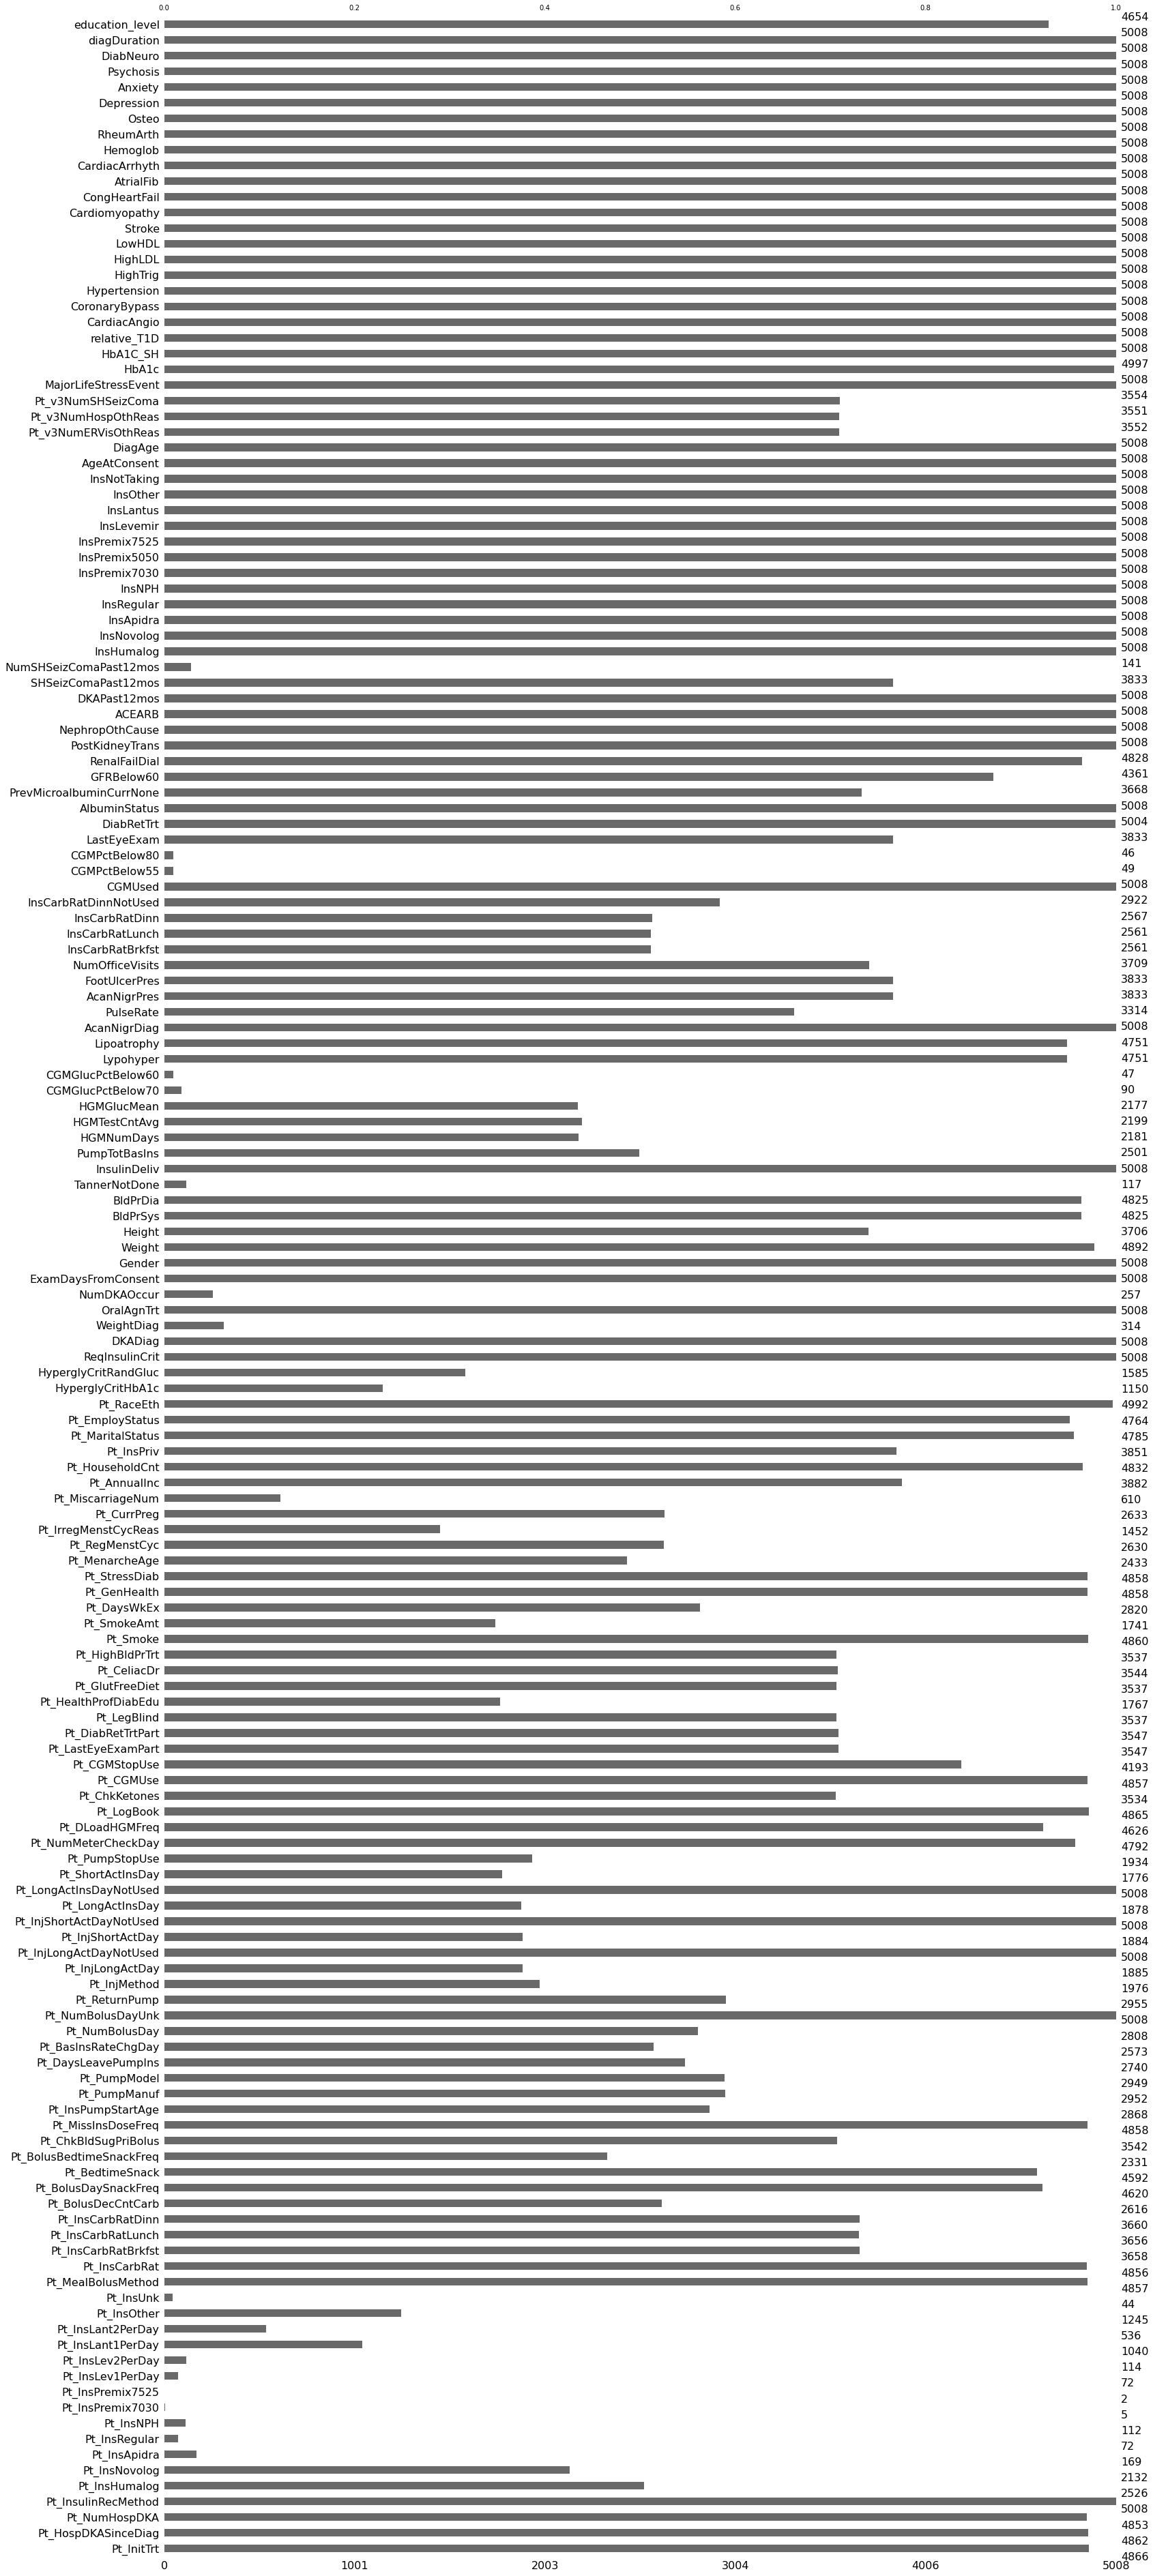

In [15]:
import missingno as msno
msno.bar(X_train)

### XGB with missing values

/usr/lib/python3/dist-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Cross Validation accuracy scores: [0.74051896 0.77644711 0.75648703 0.75848303 0.74251497 0.77644711
 0.78443114 0.73253493 0.756      0.786     ]
Cross Validation accuracy: 0.761 +/- 0.018

 
 ===========   Train Dataset    =============
88.27875399361022


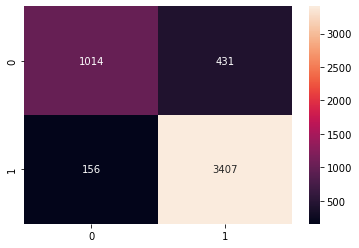

              precision    recall  f1-score   support

         0.0       0.87      0.70      0.78      1445
         1.0       0.89      0.96      0.92      3563

    accuracy                           0.88      5008
   macro avg       0.88      0.83      0.85      5008
weighted avg       0.88      0.88      0.88      5008

Accuracy of XGB on training set: 0.88


 ===========   Test Dataset    =============
76.89799720540289
              precision    recall  f1-score   support

         0.0       0.62      0.52      0.56       619
         1.0       0.82      0.87      0.84      1528

    accuracy                           0.77      2147
   macro avg       0.72      0.69      0.70      2147
weighted avg       0.76      0.77      0.76      2147



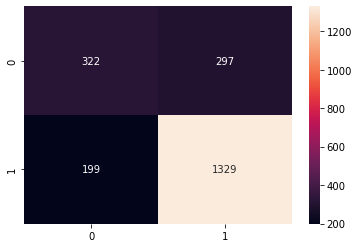

Accuracy of XGB classifier on test set: 0.77


 ===========   Class-wise test accuracy    =============
classwise accuracy:  [0.52019386 0.8697644 ]
average accuracy:  0.6949791294859975


In [16]:
# xgboost - train with missing values

X_train.drop(['SHSeizComaPast12mos', 'NumSHSeizComaPast12mos', 'Pt_v3NumSHSeizComa'], inplace=True, axis=1)
X_test.drop(['SHSeizComaPast12mos', 'NumSHSeizComaPast12mos', 'Pt_v3NumSHSeizComa'], inplace=True, axis=1)

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model=XGBClassifier(
        use_label_encoder=False, eta = 0.1,#eta between(0.01-0.2)
        max_depth = 4, #values between(3-10)
        max_delta_step = 10,
        subsample = 0.5,#values between(0.5-1)
        colsample_bytree = 1,#values between(0.5-1)
        tree_method = "auto",
        process_type = "default",
        num_parallel_tree=7,
        objective='multi:softmax',
#         min_child_weight = 3,
        booster='gbtree',
        eval_metric = "mlogloss",
        num_class = n_classes
    )
                   
model.fit(X_train,Y_train)

# cross validation
scores = cross_val_score(model, X=X_train, y=Y_train, cv=10, n_jobs=1)
print('Cross Validation accuracy scores: %s' % scores)
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))


xgb_pred=model.predict(X_test)
xgb_pred_train=model.predict(X_train)


# proba = model.predict_proba(X_test)
# print(proba)


print("\n \n ===========   Train Dataset    =============")

print(accuracy_score(Y_train, xgb_pred_train)*100)

confusion_matrix_xgb_train = pd.DataFrame(confusion_matrix(Y_train, xgb_pred_train))
sns.heatmap(confusion_matrix_xgb_train, annot=True,fmt='g')
plt.show()

print(classification_report(Y_train, xgb_pred_train))

train_acc = model.score(X_train, Y_train)
print('Accuracy of XGB on training set: {:.2f}'.format(train_acc))



print("\n\n ===========   Test Dataset    =============")



print(accuracy_score(Y_test, xgb_pred)*100)

confusion_matrix_xgb = confusion_matrix(Y_test, xgb_pred)
sns.heatmap(confusion_matrix_xgb, annot=True, fmt='g')

print(classification_report(Y_test, xgb_pred))
plt.show()

test_acc = model.score(X_test, Y_test)
print('Accuracy of XGB classifier on test set: {:.2f}'
     .format(test_acc))

print("\n\n ===========   Class-wise test accuracy    =============")
acc = confusion_matrix_xgb.diagonal()/confusion_matrix_xgb.sum(axis=1)
print('classwise accuracy: ', acc)
print('average accuracy: ',  np.sum(acc)/2)

<AxesSubplot:>

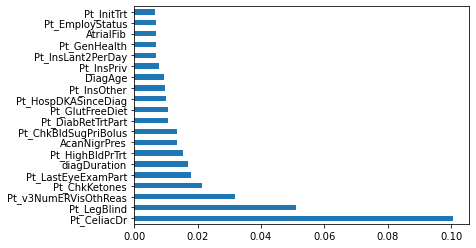

In [17]:
# feature importance graph of XGB
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns[0:162])
feat_importances.nlargest(20).plot(kind='barh')

In [18]:


X_train.update(X_train[[
             'Pt_InsPriv', 'Pt_InsHumalog', 'Pt_InsNovolog','Pt_BolusDecCntCarb', 'Pt_HealthProfDiabEdu',
             'Pt_MiscarriageNum','HyperglyCritRandGluc','NumDKAOccur','TannerNotDone','Pt_InsApidra',
             'Pt_InsRegular','Pt_InsNPH','Pt_InsLev1PerDay','Pt_InsLev2PerDay','Pt_InsLant1PerDay','Pt_InsLant2PerDay',
             'Pt_InsOther',]].fillna(0))

X_test.update(X_test[[
             'Pt_InsPriv', 'Pt_InsHumalog', 'Pt_InsNovolog','Pt_BolusDecCntCarb', 'Pt_HealthProfDiabEdu',
             'Pt_MiscarriageNum','HyperglyCritRandGluc','NumDKAOccur','TannerNotDone','Pt_InsApidra',
             'Pt_InsRegular','Pt_InsNPH','Pt_InsLev1PerDay','Pt_InsLev2PerDay','Pt_InsLant1PerDay','Pt_InsLant2PerDay',
             'Pt_InsOther',]].fillna(0))

/usr/lib/python3/dist-packages/pandas/core/frame.py:6397: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


In [19]:
# fill nan values in categorical dataset with frequent value

# tested wuth mean and median - results is lower than most_frequent
imputeX = SimpleImputer(missing_values=np.nan, strategy = "most_frequent")
# imputeX = KNNImputer(missing_values=np.nan, n_neighbors = 3, weights='distance')
# imputeX = IterativeImputer(max_iter=5, random_state=0)

X_train = imputeX.fit_transform(X_train)


In [20]:
# test data imputation

Test = X_test.copy()
Test.loc[:,y_label] = Y_test

X_test = imputeX.transform(X_test)



# Scale data

In [21]:
# Normalize numeric features
scaler = StandardScaler()
# scaler = MinMaxScaler()
select = {}
select[0] = pd.DataFrame(scaler.fit_transform(X_train))
select[1] = Y_train
select[2] = pd.DataFrame(scaler.transform(X_test))


## Feature Selection

In [22]:
# TODO

# def select_features(select, feature):
#     selected = {}
#     fs = SelectKBest(score_func=mutual_info_classif, k=feature) # k=feature score_func SelectPercentile
#     selected[0] = fs.fit_transform(select[0], select[1])
#     selected[1] = fs.transform(select[2])
        
#     idx = fs.get_support(indices=True)
    
#     return selected, fs, idx



In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

#Selecting the Best important features according to Logistic Regression
# Give better performance than selectKBest 
def select_features(select, feature):
    selected = {}
#     fs = RFE(estimator=LogisticRegression(), n_features_to_select=feature, step = 1) #  step (the number of features eliminated each iteration) 
    fs = RFE(estimator=XGBClassifier(), n_features_to_select=feature, step = 1) #  step (the number of features eliminated each iteration) 
    
    
    selected[0] = fs.fit_transform(select[0], select[1])
    selected[1] = fs.transform(select[2])
        
    idx = fs.get_support(indices=True)
    
    return selected, fs, idx


In [24]:
# Feature selection
selected, fs, idx = select_features(select, feature)


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kali/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [25]:
# Get columns to keep and create new dataframe with those only
from pprint import pprint
cols = fs.get_support(indices=True)
features_df_new = original_X.iloc[:,cols]
pprint(features_df_new.columns)
print(features_df_new.shape)

Index(['Pt_InitTrt', 'Pt_HospDKASinceDiag', 'Pt_InsLant2PerDay', 'Pt_InsOther',
       'Pt_ChkBldSugPriBolus', 'Pt_NumBolusDayUnk', 'Pt_LongActInsDay',
       'Pt_ChkKetones', 'Pt_CGMUse', 'Pt_LastEyeExamPart', 'Pt_HighBldPrTrt',
       'Pt_DaysWkEx', 'Pt_IrregMenstCycReas', 'PumpTotBasIns', 'HGMGlucMean',
       'AcanNigrDiag', 'PulseRate', 'FootUlcerPres', 'NumOfficeVisits',
       'InsCarbRatDinn', 'LastEyeExam', 'DKAPast12mos', 'InsNotTaking',
       'AgeAtConsent', 'Anxiety'],
      dtype='object')
(7155, 25)


In [26]:
X_train = pd.DataFrame(selected[0], columns = features_df_new.columns)
X_test = pd.DataFrame(selected[1], columns = features_df_new.columns)


Cross Validation accuracy scores: [0.71457086 0.75249501 0.76646707 0.74251497 0.7245509  0.73852295
 0.79041916 0.73053892 0.736      0.76      ]
Cross Validation accuracy: 0.746 +/- 0.021

 
 ===========   Train Dataset    =============
75.99840255591054


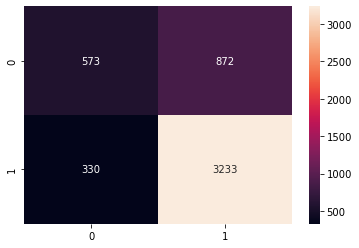

              precision    recall  f1-score   support

         0.0       0.63      0.40      0.49      1445
         1.0       0.79      0.91      0.84      3563

    accuracy                           0.76      5008
   macro avg       0.71      0.65      0.67      5008
weighted avg       0.74      0.76      0.74      5008

Accuracy of adaboost on training set: 0.76


 ===========   Test Dataset    =============
75.26781555659059


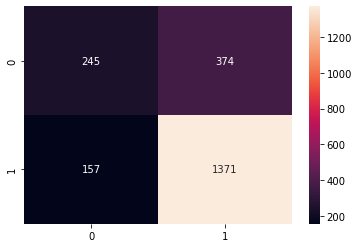

              precision    recall  f1-score   support

         0.0       0.61      0.40      0.48       619
         1.0       0.79      0.90      0.84      1528

    accuracy                           0.75      2147
   macro avg       0.70      0.65      0.66      2147
weighted avg       0.73      0.75      0.73      2147

Accuracy of adaboost classifier on test set: 0.75


 ===========   Class-wise test accuracy    =============
classwise accuracy:  [0.39579968 0.89725131]
average accuracy:  0.6465254928993732


In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

adaboost = AdaBoostClassifier(random_state=0, learning_rate=0.05, n_estimators=1000, algorithm = "SAMME.R") #algorithm{‘SAMME’, ‘SAMME.R’}, default=’SAMME.R’

# cross validation
scores = cross_val_score(adaboost, X=X_train, y=Y_train, cv=10, n_jobs=1)
print('Cross Validation accuracy scores: %s' % scores)
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

adaboost.fit(X_train, Y_train)
pred=adaboost.predict(X_test)

pred_train=adaboost.predict(X_train)

# proba = adaboost.predict_proba(X_test)
# print(proba)


print("\n \n ===========   Train Dataset    =============")

print(accuracy_score(Y_train, pred_train)*100)

confusion_matrix_ada_train = pd.DataFrame(confusion_matrix(Y_train, pred_train))
sns.heatmap(confusion_matrix_ada_train, annot=True,fmt='g')
plt.show()

print(classification_report(Y_train, pred_train))

train_acc = adaboost.score(X_train, Y_train)
print('Accuracy of adaboost on training set: {:.2f}'.format(train_acc))



print("\n\n ===========   Test Dataset    =============")

print(accuracy_score(Y_test, pred)*100)

confusion_matrix_ada = confusion_matrix(Y_test, pred)
sns.heatmap(confusion_matrix_ada, annot=True,fmt='g')
plt.show()

print(classification_report(Y_test, pred))
test_acc = adaboost.score(X_test, Y_test)
print('Accuracy of adaboost classifier on test set: {:.2f}'
     .format(test_acc))


print("\n\n ===========   Class-wise test accuracy    =============")
acc = confusion_matrix_ada.diagonal()/confusion_matrix_ada.sum(axis=1)
print('classwise accuracy: ',(acc))
print('average accuracy: ',( np.sum(acc)/2))


<AxesSubplot:>

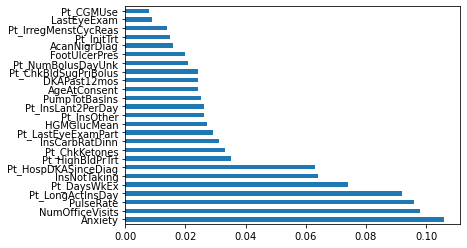

In [28]:
feat_importances = pd.Series(adaboost.feature_importances_, index=X_train.columns[0:feature])
feat_importances.nlargest(feature).plot(kind='barh')

# Model - XGB

Cross Validation accuracy scores: [0.74051896 0.76846307 0.77245509 0.75648703 0.73253493 0.76846307
 0.79840319 0.74251497 0.762      0.762     ]
Cross Validation accuracy: 0.760 +/- 0.018

 
 ===========   Train Dataset    =============
83.94568690095848


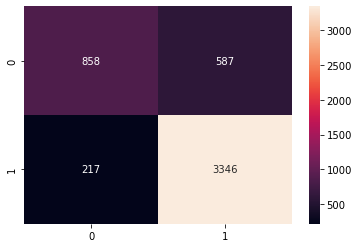

              precision    recall  f1-score   support

         0.0       0.80      0.59      0.68      1445
         1.0       0.85      0.94      0.89      3563

    accuracy                           0.84      5008
   macro avg       0.82      0.77      0.79      5008
weighted avg       0.84      0.84      0.83      5008

Accuracy of XGB on training set: 0.84


 ===========   Test Dataset    =============
75.31439217512809
              precision    recall  f1-score   support

         0.0       0.60      0.42      0.50       619
         1.0       0.79      0.89      0.84      1528

    accuracy                           0.75      2147
   macro avg       0.70      0.65      0.67      2147
weighted avg       0.74      0.75      0.74      2147



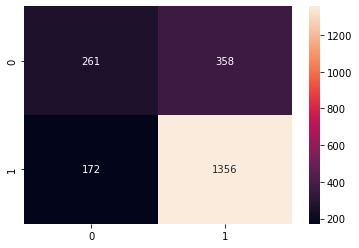

Accuracy of XGB classifier on test set: 0.75


 ===========   Class-wise test accuracy    =============
classwise accuracy:  [0.42164782 0.88743455]
average accuracy:  0.6545411870184135


In [29]:
# xgboost - train with missing values
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb_impute=XGBClassifier(
    use_label_encoder=False, eta = 0.1,#eta between(0.01-0.2)
        max_depth = 4, #values between(3-10)
        max_delta_step = 10,
        subsample = 0.5,#values between(0.5-1)
        colsample_bytree = 1,#values between(0.5-1)
        tree_method = "auto",
        process_type = "default",
        num_parallel_tree=7,
        objective='multi:softmax',
#         min_child_weight = 3,
        booster='gbtree',
        eval_metric = "mlogloss",
        num_class = n_classes
        )
        
xgb_impute.fit(X_train,Y_train)

# cross validation
scores = cross_val_score(xgb_impute, X=X_train, y=Y_train, cv=10, n_jobs=1)
print('Cross Validation accuracy scores: %s' % scores)
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))


xgb_pred=xgb_impute.predict(X_test)
xgb_pred_train=xgb_impute.predict(X_train)


# proba = xgb_impute.predict_proba(X_test)
# print(proba)


print("\n \n ===========   Train Dataset    =============")

print(accuracy_score(Y_train, xgb_pred_train)*100)

confusion_matrix_xgb_train = pd.DataFrame(confusion_matrix(Y_train, xgb_pred_train))
sns.heatmap(confusion_matrix_xgb_train, annot=True,fmt='g')
plt.show()

print(classification_report(Y_train, xgb_pred_train))

train_acc = xgb_impute.score(X_train, Y_train)
print('Accuracy of XGB on training set: {:.2f}'.format(train_acc))



print("\n\n ===========   Test Dataset    =============")



print(accuracy_score(Y_test, xgb_pred)*100)

confusion_matrix_xgb = confusion_matrix(Y_test, xgb_pred)
sns.heatmap(confusion_matrix_xgb, annot=True, fmt='g')
print(classification_report(Y_test, xgb_pred))
plt.show()

test_acc = xgb_impute.score(X_test, Y_test)
print('Accuracy of XGB classifier on test set: {:.2f}'
     .format(test_acc))


print("\n\n ===========   Class-wise test accuracy    =============")
acc = confusion_matrix_xgb.diagonal()/confusion_matrix_xgb.sum(axis=1)
print('classwise accuracy: ',(acc))
print('average accuracy: ',( np.sum(acc)/2))


<AxesSubplot:>

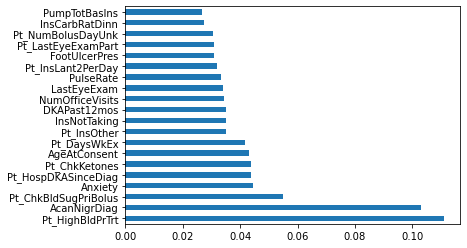

In [30]:
# feature importance graph of XGB
feat_importances = pd.Series(xgb_impute.feature_importances_, index=X_train.columns[0:feature])
feat_importances.nlargest(20).plot(kind='barh')

## Model 2 - Random forest

Cross Validation accuracy scores: [0.72255489 0.73453094 0.73453094 0.71457086 0.69660679 0.74650699
 0.74451098 0.73053892 0.726      0.714     ]
Cross Validation accuracy: 0.726 +/- 0.014
===========   Train Dataset    =============
86.12220447284345


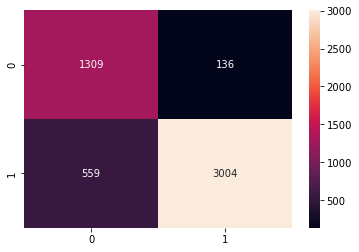

              precision    recall  f1-score   support

         0.0       0.70      0.91      0.79      1445
         1.0       0.96      0.84      0.90      3563

    accuracy                           0.86      5008
   macro avg       0.83      0.87      0.84      5008
weighted avg       0.88      0.86      0.87      5008

Accuracy of XGB on training set: 0.86


 ===========   Test Dataset    =============
72.93898462971589
              precision    recall  f1-score   support

         0.0       0.52      0.68      0.59       619
         1.0       0.85      0.75      0.80      1528

    accuracy                           0.73      2147
   macro avg       0.69      0.72      0.70      2147
weighted avg       0.76      0.73      0.74      2147



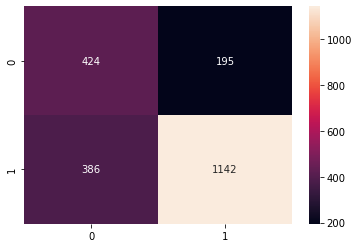

Accuracy of random forest classifier classifier on test set: 0.73


 ===========   Class-wise test accuracy    =============
classwise accuracy:  [0.68497577 0.7473822 ]
average accuracy:  0.7161789831598


In [31]:
#  random forest classifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


rf=RandomForestClassifier(max_depth=10,
                             n_estimators = 20,
                             criterion = 'entropy', # {“gini”, “entropy”}, default=”gini”
                             class_weight = 'balanced_subsample', # {“balanced”, “balanced_subsample”}, dict or list of dicts, default=None
                             ccp_alpha=0.0001,
                             random_state=0)

# cross validation
scores = cross_val_score(rf, X=X_train, y=Y_train, cv=10, n_jobs=1)
print('Cross Validation accuracy scores: %s' % scores)
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))


rf.fit(X_train,Y_train)

pred=rf.predict(X_test)
pred_train=rf.predict(X_train)


# proba = rf.predict_proba(X_test)

# print(proba)

print("===========   Train Dataset    =============")

print(accuracy_score(Y_train, pred_train)*100)

confusion_matrix_rfc_train = pd.DataFrame(confusion_matrix(Y_train, pred_train))
sns.heatmap(confusion_matrix_rfc_train, annot=True,fmt='g')
plt.show()

print(classification_report(Y_train, pred_train))

train_acc = rf.score(X_train, Y_train)
print('Accuracy of XGB on training set: {:.2f}'.format(train_acc))



print("\n\n ===========   Test Dataset    =============")


print(accuracy_score(Y_test, pred)*100)

confusion_matrix_rf = confusion_matrix(Y_test, pred)
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g')

print(classification_report(Y_test, pred))
plt.show()

test_acc = rf.score(X_test, Y_test)
print('Accuracy of random forest classifier classifier on test set: {:.2f}'
     .format(test_acc))

print("\n\n ===========   Class-wise test accuracy    =============")
acc = confusion_matrix_rf.diagonal()/confusion_matrix_rf.sum(axis=1)
print('classwise accuracy: ',(acc))
print('average accuracy: ',( np.sum(acc)/2))

<AxesSubplot:>

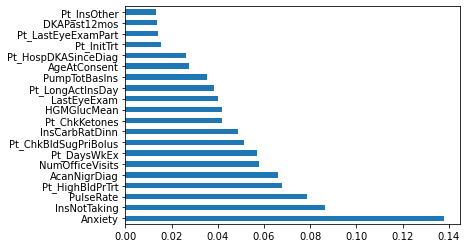

In [32]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns[0:feature])
feat_importances.nlargest(20).plot(kind='barh')

## Model 3 LogisticRegression

/home/kali/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/kali/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/kali/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/kali/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/kali/.local/li

Cross Validation accuracy scores: [0.68463074 0.71656687 0.70259481 0.70459082 0.67065868 0.71856287
 0.73253493 0.71457086 0.726      0.676     ]
Cross Validation accuracy: 0.705 +/- 0.020

 
 ===========   Train Dataset    =============
70.68690095846645


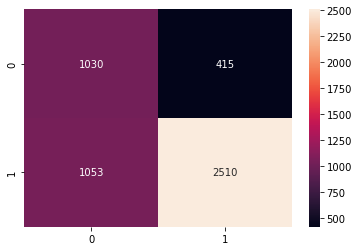

              precision    recall  f1-score   support

         0.0       0.49      0.71      0.58      1445
         1.0       0.86      0.70      0.77      3563

    accuracy                           0.71      5008
   macro avg       0.68      0.71      0.68      5008
weighted avg       0.75      0.71      0.72      5008

Accuracy of LR on training set: 0.71


 ===========   Test Dataset    =============
70.09781089892874
              precision    recall  f1-score   support

         0.0       0.49      0.72      0.58       619
         1.0       0.86      0.69      0.77      1528

    accuracy                           0.70      2147
   macro avg       0.67      0.71      0.67      2147
weighted avg       0.75      0.70      0.71      2147



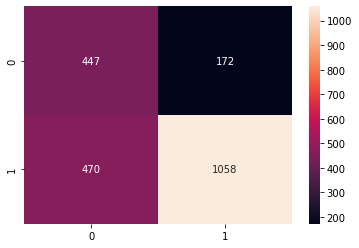

Accuracy of logistic regression on test set: 0.70


 ===========   Class-wise test accuracy    =============
classwise accuracy:  [0.72213247 0.69240838]
average accuracy:  0.7072704243459726


In [33]:
from sklearn.linear_model import LogisticRegression

#penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
logreg = LogisticRegression(
    penalty='l2',
    tol = 5e-4,
    C=1,
    l1_ratio = 10,
    class_weight='balanced',  # balanced
    random_state=0,
    solver = 'saga' # saga, sag
)

# cross validation
scores = cross_val_score(logreg, X=X_train, y=Y_train, cv=10, n_jobs=1)
print('Cross Validation accuracy scores: %s' % scores)
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

logreg.fit(X_train, Y_train)

pred=logreg.predict(X_test)
pred_train=logreg.predict(X_train)

proba = logreg.predict_proba(X_test)


# for i,val in enumerate(proba):
#     print(proba[i], pred[i], Y_test.to_numpy()[i] )

print("\n \n ===========   Train Dataset    =============")

print(accuracy_score(Y_train, pred_train)*100)

confusion_matrix_lg_train = pd.DataFrame(confusion_matrix(Y_train, pred_train))
sns.heatmap(confusion_matrix_lg_train, annot=True,fmt='g')
plt.show()

print(classification_report(Y_train, pred_train))

train_acc = logreg.score(X_train, Y_train)
print('Accuracy of LR on training set: {:.2f}'.format(train_acc))



print("\n\n ===========   Test Dataset    =============")

print(accuracy_score(Y_test, pred)*100)

confusion_matrix_lr = confusion_matrix(Y_test, pred)
sns.heatmap(confusion_matrix_lr, annot=True, fmt='g')

print(classification_report(Y_test, pred))
plt.show()

test_acc = logreg.score(X_test, Y_test)
print('Accuracy of logistic regression on test set: {:.2f}'
     .format(test_acc))


print("\n\n ===========   Class-wise test accuracy    =============")
acc = confusion_matrix_lr.diagonal()/confusion_matrix_lr.sum(axis=1)
print('classwise accuracy: ',(acc))
print('average accuracy: ',( np.sum(acc)/2))

<AxesSubplot:>

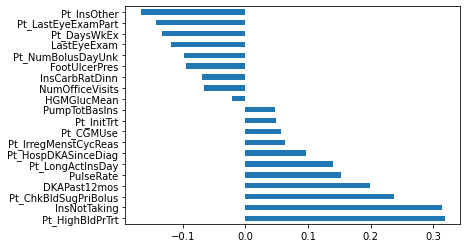

In [34]:

feat_importances = pd.Series(logreg.coef_[0], index=X_train.columns[0:feature])
feat_importances.nlargest(20).plot(kind='barh')

## Model 4 - Decision tree

Cross Validation accuracy scores: [0.69860279 0.68862275 0.7005988  0.71457086 0.7005988  0.68662675
 0.68463074 0.71457086 0.72       0.7       ]
Cross Validation accuracy: 0.701 +/- 0.012

 
===========   Train Dataset    =============
100.0


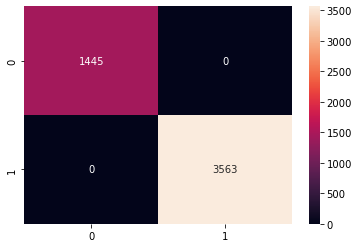

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1445
         1.0       1.00      1.00      1.00      3563

    accuracy                           1.00      5008
   macro avg       1.00      1.00      1.00      5008
weighted avg       1.00      1.00      1.00      5008

Accuracy of XGB on training set: 1.00


 ===========   Test Dataset    =============
69.30600838379134
              precision    recall  f1-score   support

         0.0       0.47      0.47      0.47       619
         1.0       0.78      0.79      0.78      1528

    accuracy                           0.69      2147
   macro avg       0.63      0.63      0.63      2147
weighted avg       0.69      0.69      0.69      2147



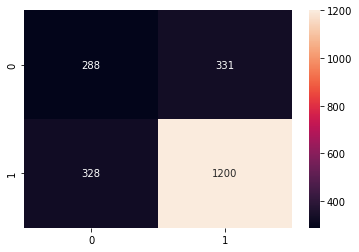

Accuracy of DT on test set: 0.69


 ===========   Class-wise test accuracy    =============
classwise accuracy:  [0.46526656 0.78534031]
average accuracy:  0.6253034365511


In [35]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(
                        random_state=0,
                        criterion='gini',
                        splitter = 'best',
                        max_depth = 100,
                        max_features = 19).fit(X_train, Y_train)

# cross validation
scores = cross_val_score(clf, X=X_train, y=Y_train, cv=10, n_jobs=1)
print('Cross Validation accuracy scores: %s' % scores)
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))


pred=clf.predict(X_test)
pred_train=clf.predict(X_train)


print("\n \n===========   Train Dataset    =============")

print(accuracy_score(Y_train, pred_train)*100)

confusion_matrix_dt_train = pd.DataFrame(confusion_matrix(Y_train, pred_train))
sns.heatmap(confusion_matrix_dt_train, annot=True,fmt='g')
plt.show()

print(classification_report(Y_train, pred_train))

train_acc = clf.score(X_train, Y_train)
print('Accuracy of XGB on training set: {:.2f}'.format(train_acc))



print("\n\n ===========   Test Dataset    =============")

print(accuracy_score(Y_test, pred)*100)

confusion_matrix_dt =confusion_matrix(Y_test, pred)
sns.heatmap(confusion_matrix_dt, annot=True, fmt='g')

print(classification_report(Y_test, pred))
plt.show()

test_acc = clf.score(X_test, Y_test)
print('Accuracy of DT on test set: {:.2f}'.format(test_acc))


print("\n\n ===========   Class-wise test accuracy    =============")
acc = confusion_matrix_dt.diagonal()/confusion_matrix_dt.sum(axis=1)
print('classwise accuracy: ',(acc))
print('average accuracy: ',( np.sum(acc)/2))

<AxesSubplot:>

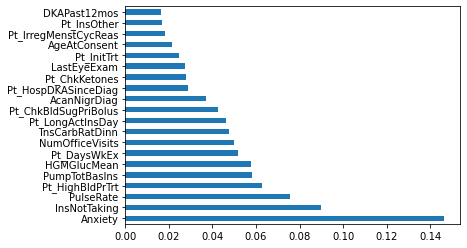

In [36]:

feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns[0:feature])
feat_importances.nlargest(20).plot(kind='barh')

## Model 5 - K-Nearest Neighbors

Cross Validation accuracy scores: [0.68862275 0.69261477 0.69261477 0.70858283 0.7005988  0.68063872
 0.7245509  0.69660679 0.684      0.674     ]
Cross Validation accuracy: 0.694 +/- 0.014
===========   Train Dataset    =============
100.0


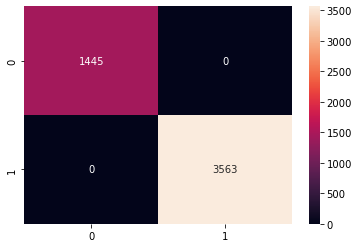

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1445
         1.0       1.00      1.00      1.00      3563

    accuracy                           1.00      5008
   macro avg       1.00      1.00      1.00      5008
weighted avg       1.00      1.00      1.00      5008

Accuracy of XGB on training set: 1.00


 ===========   Test Dataset    =============
68.09501630181649
              precision    recall  f1-score   support

         0.0       0.44      0.42      0.43       619
         1.0       0.77      0.79      0.78      1528

    accuracy                           0.68      2147
   macro avg       0.61      0.60      0.60      2147
weighted avg       0.68      0.68      0.68      2147



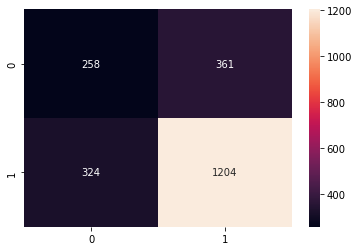

Accuracy of KNN on test set: 0.68


 ===========   Class-wise test accuracy    =============
classwise accuracy:  [0.41680129 0.78795812]
average accuracy:  0.6023797037951771


In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(
    n_neighbors =1,
    weights = "uniform", # uniform, distance
    algorithm =  'brute', # {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
)

# cross validation
scores = cross_val_score(knn, X=X_train, y=Y_train, cv=10, n_jobs=1)
print('Cross Validation accuracy scores: %s' % scores)
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

knn.fit(X_train, Y_train)


pred=knn.predict(X_test)

pred_train=knn.predict(X_train)


print("===========   Train Dataset    =============")

print(accuracy_score(Y_train, pred_train)*100)

confusion_matrix_dt_train = pd.DataFrame(confusion_matrix(Y_train, pred_train))
sns.heatmap(confusion_matrix_dt_train, annot=True,fmt='g')
plt.show()

print(classification_report(Y_train, pred_train))

train_acc = knn.score(X_train, Y_train)
print('Accuracy of XGB on training set: {:.2f}'.format(train_acc))


print("\n\n ===========   Test Dataset    =============")

print(accuracy_score(Y_test, pred)*100)

confusion_matrix_knn = confusion_matrix(Y_test, pred)
sns.heatmap(confusion_matrix_knn, annot=True, fmt='g')
print(classification_report(Y_test, pred))
plt.show()

test_acc = knn.score(X_test, Y_test)
print('Accuracy of KNN on test set: {:.2f}'.format(test_acc))


print("\n\n ===========   Class-wise test accuracy    =============")
acc = confusion_matrix_knn.diagonal()/confusion_matrix_knn.sum(axis=1)
print('classwise accuracy: ',(acc))
print('average accuracy: ',( np.sum(acc)/2))

## Model 6 - Linear Discriminant Analysis

===========   Train Dataset    =============
75.3594249201278


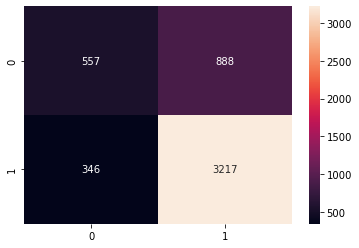

              precision    recall  f1-score   support

         0.0       0.62      0.39      0.47      1445
         1.0       0.78      0.90      0.84      3563

    accuracy                           0.75      5008
   macro avg       0.70      0.64      0.66      5008
weighted avg       0.74      0.75      0.73      5008

Accuracy of XGB on training set: 0.75


 ===========   Test Dataset    =============
74.75547275267816
              precision    recall  f1-score   support

         0.0       0.59      0.39      0.47       619
         1.0       0.78      0.89      0.83      1528

    accuracy                           0.75      2147
   macro avg       0.69      0.64      0.65      2147
weighted avg       0.73      0.75      0.73      2147



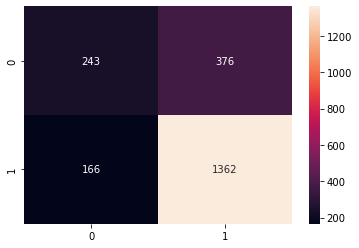

Accuracy of LDA on test set: 0.75


 ===========   Class-wise test accuracy    =============
classwise accuracy:  [0.39256866 0.89136126]
average accuracy:  0.6419649578360639


In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(
    solver = 'eigen', # solver{‘svd’, ‘lsqr’, ‘eigen’}, default=’svd’
    shrinkage= 'auto', #shrinkage‘auto’ or float, default=None
    n_components = 1,
    tol = 1e-3                       
)
lda.fit(X_train, Y_train)


pred=lda.predict(X_test)
pred_train=lda.predict(X_train)


print("===========   Train Dataset    =============")

print(accuracy_score(Y_train, pred_train)*100)

confusion_matrix_dt_train = pd.DataFrame(confusion_matrix(Y_train, pred_train))
sns.heatmap(confusion_matrix_dt_train, annot=True,fmt='g')
plt.show()

print(classification_report(Y_train, pred_train))

train_acc = lda.score(X_train, Y_train)
print('Accuracy of XGB on training set: {:.2f}'.format(train_acc))



print("\n\n ===========   Test Dataset    =============")


print(accuracy_score(Y_test, pred)*100)

confusion_matrix_lda = confusion_matrix(Y_test, pred)
sns.heatmap(confusion_matrix_lda, annot=True, fmt='g')
print(classification_report(Y_test, pred))
plt.show()

test_acc = lda.score(X_test, Y_test)
print('Accuracy of LDA on test set: {:.2f}'
     .format(test_acc))


print("\n\n ===========   Class-wise test accuracy    =============")
acc = confusion_matrix_lda.diagonal()/confusion_matrix_lda.sum(axis=1)
print('classwise accuracy: ',(acc))
print('average accuracy: ',( np.sum(acc)/2))

## Model 7- Gaussian Naive Bayes

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.533669923120631)
===========   Train Dataset    =============
72.8035143769968


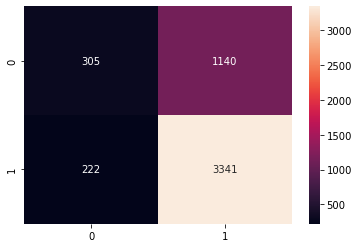

              precision    recall  f1-score   support

         0.0       0.58      0.21      0.31      1445
         1.0       0.75      0.94      0.83      3563

    accuracy                           0.73      5008
   macro avg       0.66      0.57      0.57      5008
weighted avg       0.70      0.73      0.68      5008

Accuracy of XGB on training set: 0.73


 ===========   Test Dataset    =============
72.47321844434094
              precision    recall  f1-score   support

         0.0       0.56      0.21      0.31       619
         1.0       0.75      0.93      0.83      1528

    accuracy                           0.72      2147
   macro avg       0.65      0.57      0.57      2147
weighted avg       0.69      0.72      0.68      2147



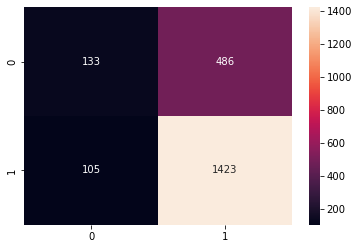

Accuracy of gaussian naive bayes on test set: 0.72


 ===========   Class-wise test accuracy    =============
classwise accuracy:  [0.21486268 0.93128272]
average accuracy:  0.5730727021289193


In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

gnb = GaussianNB()

param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nbModel_grid = GridSearchCV(estimator=gnb, param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, Y_train)

# best parameters
print(nbModel_grid.best_estimator_)

gnb = GaussianNB(priors=None, var_smoothing=1.0)
gnb.fit(X_train, Y_train)
      
pred=gnb.predict(X_test)

pred_train=gnb.predict(X_train)


print("===========   Train Dataset    =============")

print(accuracy_score(Y_train, pred_train)*100)

confusion_matrix_dt_train = pd.DataFrame(confusion_matrix(Y_train, pred_train))
sns.heatmap(confusion_matrix_dt_train, annot=True,fmt='g')
plt.show()

print(classification_report(Y_train, pred_train))

train_acc = gnb.score(X_train, Y_train)
print('Accuracy of XGB on training set: {:.2f}'.format(train_acc))



print("\n\n ===========   Test Dataset    =============")


print(accuracy_score(Y_test, pred)*100)

confusion_matrix_gnb = confusion_matrix(Y_test, pred)
sns.heatmap(confusion_matrix_gnb, annot=True, fmt='g')
print(classification_report(Y_test, pred))
plt.show()

test_acc = gnb.score(X_test, Y_test)
print('Accuracy of gaussian naive bayes on test set: {:.2f}'.format(test_acc))


print("\n\n ===========   Class-wise test accuracy    =============")
acc = confusion_matrix_gnb.diagonal()/confusion_matrix_gnb.sum(axis=1)
print('classwise accuracy: ',(acc))
print('average accuracy: ',( np.sum(acc)/2))

## Model 8 - SVM

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV 1/5] END C=0.1, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.712 total time=   0.0s
[CV 2/5] END C=0.1, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.711 total time=   0.0s
[CV 3/5] END C=0.1, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.713 total time=   0.0s
[CV 4/5] END C=0.1, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.709 total time=   0.0s
[CV 5/5] END C=0.1, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.711 total time=   0.0s
[CV 1/5] END C=0.1, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.709 total time=   0.0s
[CV 2/5] END C=0.1, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.710 total time=   0.0s
[CV 3/5] END C=0.1, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.299 total time=   0.0s
[CV 4/5] END C=0.1, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.295 total time=   0.0s

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('


[CV 5/5] END C=0.1, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.296 total time=   0.0s
[CV 1/5] END C=0.1, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.711 total time=   0.0s
[CV 2/5] END C=0.1, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.710 total time=   0.0s
[CV 3/5] END C=0.1, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.711 total time=   0.0s
[CV 4/5] END C=0.1, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.708 total time=   0.0s
[CV 5/5] END C=0.1, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.712 total time=   0.0s
[CV 1/5] END C=0.1, degree=0, gamma=0.1, kernel=rbf, max_iter=10;, score=0.353 total time=   0.0s
[CV 2/5] END C=0.1, degree=0, gamma=0.1, kernel=rbf, max_iter=10;, score=0.448 total time=   0.0s
[CV 3/5] END C=0.1, degree=0, gamma=0.1, kernel=rbf, max_iter=10;, score=0.400 total time=   0.0s
[CV 4/5] END C=0.1, degree=0, gamma=0.1, kernel=rbf, max_iter=10;, score=0.309 total time=   0.0s


/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=0.1, degree=0, gamma=0.1, kernel=rbf, max_iter=10;, score=0.412 total time=   0.0s
[CV 1/5] END C=0.1, degree=0, gamma=0.1, kernel=rbf, max_iter=15;, score=0.354 total time=   0.0s
[CV 2/5] END C=0.1, degree=0, gamma=0.1, kernel=rbf, max_iter=15;, score=0.412 total time=   0.0s
[CV 3/5] END C=0.1, degree=0, gamma=0.1, kernel=rbf, max_iter=15;, score=0.437 total time=   0.0s
[CV 4/5] END C=0.1, degree=0, gamma=0.1, kernel=rbf, max_iter=15;, score=0.426 total time=   0.0s
[CV 5/5] END C=0.1, degree=0, gamma=0.1, kernel=rbf, max_iter=15;, score=0.413 total time=   0.0s
[CV 1/5] END C=0.1, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.419 total time=   0.0s
[CV 2/5] END C=0.1, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.469 total time=   0.0s
[CV 3/5] END C=0.1, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.465 total time=   0.0s
[CV 4/5] END C=0.1, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.418 total time=   0.0s


/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=0.1, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.468 total time=   0.0s
[CV 1/5] END C=0.1, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.679 total time=   0.0s
[CV 2/5] END C=0.1, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.712 total time=   0.0s
[CV 3/5] END C=0.1, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.555 total time=   0.0s
[CV 4/5] END C=0.1, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.697 total time=   0.0s
[CV 5/5] END C=0.1, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.608 total time=   0.0s
[CV 1/5] END C=0.1, degree=0, gamma=0.01, kernel=rbf, max_iter=15;, score=0.669 total time=   0.0s
[CV 2/5] END C=0.1, degree=0, gamma=0.01, kernel=rbf, max_iter=15;, score=0.705 total time=   0.0s
[CV 3/5] END C=0.1, degree=0, gamma=0.01, kernel=rbf, max_iter=15;, score=0.608 total time=   0.0s
[CV 4/5] END C=0.1, degree=0, gamma=0.01, kernel=rbf, max_iter=15;, score=0.707 total time=   0.0s
[CV 5/5] EN

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=0.1, degree=0, gamma=0.01, kernel=rbf, max_iter=20;, score=0.683 total time=   0.0s
[CV 2/5] END C=0.1, degree=0, gamma=0.01, kernel=rbf, max_iter=20;, score=0.653 total time=   0.0s
[CV 3/5] END C=0.1, degree=0, gamma=0.01, kernel=rbf, max_iter=20;, score=0.673 total time=   0.0s
[CV 4/5] END C=0.1, degree=0, gamma=0.01, kernel=rbf, max_iter=20;, score=0.682 total time=   0.0s
[CV 5/5] END C=0.1, degree=0, gamma=0.01, kernel=rbf, max_iter=20;, score=0.709 total time=   0.0s
[CV 1/5] END C=0.1, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.659 total time=   0.0s
[CV 2/5] END C=0.1, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.700 total time=   0.0s
[CV 3/5] END C=0.1, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.708 total time=   0.0s
[CV 4/5] END C=0.1, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.682 total time=   0.0s
[CV 5/5] END C=0.1, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.703 total time=   0.0s
[CV 1

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=0.1, degree=0, gamma=0.001, kernel=rbf, max_iter=15;, score=0.713 total time=   0.0s
[CV 1/5] END C=0.1, degree=0, gamma=0.001, kernel=rbf, max_iter=20;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.1, degree=0, gamma=0.001, kernel=rbf, max_iter=20;, score=0.725 total time=   0.1s
[CV 3/5] END C=0.1, degree=0, gamma=0.001, kernel=rbf, max_iter=20;, score=0.723 total time=   0.0s
[CV 4/5] END C=0.1, degree=0, gamma=0.001, kernel=rbf, max_iter=20;, score=0.712 total time=   0.0s
[CV 5/5] END C=0.1, degree=0, gamma=0.001, kernel=rbf, max_iter=20;, score=0.713 total time=   0.0s
[CV 1/5] END C=0.1, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.657 total time=   0.0s
[CV 2/5] END C=0.1, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.710 total time=   0.0s
[CV 3/5] END C=0.1, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.708 total time=   0.0s
[CV 4/5] END C=0.1, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.708 total time=   0

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=0.1, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.706 total time=   0.0s
[CV 1/5] END C=0.1, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.676 total time=   0.0s
[CV 2/5] END C=0.1, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.714 total time=   0.0s
[CV 3/5] END C=0.1, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.711 total time=   0.0s
[CV 4/5] END C=0.1, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.690 total time=   0.0s
[CV 5/5] END C=0.1, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.712 total time=   0.0s
[CV 1/5] END C=0.1, degree=0, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.679 total time=   0.0s
[CV 2/5] END C=0.1, degree=0, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.721 total time=   0.0s
[CV 3/5] END C=0.1, degree=0, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.713 total time=   0.0s
[CV 4/5] END C=0.1, degree=0, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.706 total tim

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 4/5] END C=0.1, degree=1, gamma=1, kernel=rbf, max_iter=10;, score=0.709 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, gamma=1, kernel=rbf, max_iter=10;, score=0.711 total time=   0.0s
[CV 1/5] END C=0.1, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.709 total time=   0.0s
[CV 2/5] END C=0.1, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.710 total time=   0.0s
[CV 3/5] END C=0.1, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.299 total time=   0.0s
[CV 4/5] END C=0.1, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.295 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.296 total time=   0.0s
[CV 1/5] END C=0.1, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.711 total time=   0.0s
[CV 2/5] END C=0.1, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.710 total time=   0.0s
[CV 3/5] END C=0.1, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.711 total time=   0.0s
[CV 4/5] END C=0.1, degree=1, gamma=1, k

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=0.1, degree=1, gamma=0.1, kernel=rbf, max_iter=10;, score=0.448 total time=   0.0s
[CV 3/5] END C=0.1, degree=1, gamma=0.1, kernel=rbf, max_iter=10;, score=0.400 total time=   0.0s
[CV 4/5] END C=0.1, degree=1, gamma=0.1, kernel=rbf, max_iter=10;, score=0.309 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, gamma=0.1, kernel=rbf, max_iter=10;, score=0.412 total time=   0.0s
[CV 1/5] END C=0.1, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.354 total time=   0.0s
[CV 2/5] END C=0.1, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.412 total time=   0.0s
[CV 3/5] END C=0.1, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.437 total time=   0.0s
[CV 4/5] END C=0.1, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.426 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.413 total time=   0.0s
[CV 1/5] END C=0.1, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.419 total time=   0.0s
[CV 2/5] END C=0.1, 

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=0.1, degree=1, gamma=0.01, kernel=rbf, max_iter=10;, score=0.679 total time=   0.0s
[CV 2/5] END C=0.1, degree=1, gamma=0.01, kernel=rbf, max_iter=10;, score=0.712 total time=   0.0s
[CV 3/5] END C=0.1, degree=1, gamma=0.01, kernel=rbf, max_iter=10;, score=0.555 total time=   0.0s
[CV 4/5] END C=0.1, degree=1, gamma=0.01, kernel=rbf, max_iter=10;, score=0.697 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, gamma=0.01, kernel=rbf, max_iter=10;, score=0.608 total time=   0.0s
[CV 1/5] END C=0.1, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.669 total time=   0.0s
[CV 2/5] END C=0.1, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.705 total time=   0.0s
[CV 3/5] END C=0.1, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.608 total time=   0.0s
[CV 4/5] END C=0.1, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.707 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.708 total time=   0.0s
[CV 1/5] E

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=0.1, degree=1, gamma=0.001, kernel=rbf, max_iter=10;, score=0.700 total time=   0.0s
[CV 3/5] END C=0.1, degree=1, gamma=0.001, kernel=rbf, max_iter=10;, score=0.708 total time=   0.0s
[CV 4/5] END C=0.1, degree=1, gamma=0.001, kernel=rbf, max_iter=10;, score=0.682 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, gamma=0.001, kernel=rbf, max_iter=10;, score=0.703 total time=   0.0s
[CV 1/5] END C=0.1, degree=1, gamma=0.001, kernel=rbf, max_iter=15;, score=0.712 total time=   0.0s
[CV 2/5] END C=0.1, degree=1, gamma=0.001, kernel=rbf, max_iter=15;, score=0.714 total time=   0.0s
[CV 3/5] END C=0.1, degree=1, gamma=0.001, kernel=rbf, max_iter=15;, score=0.710 total time=   0.0s
[CV 4/5] END C=0.1, degree=1, gamma=0.001, kernel=rbf, max_iter=15;, score=0.722 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, gamma=0.001, kernel=rbf, max_iter=15;, score=0.713 total time=   0.0s
[CV 1/5] END C=0.1, degree=1, gamma=0.001, kernel=rbf, max_iter=20;, score=0.707 total time=   0.0s


/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=0.1, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.657 total time=   0.0s
[CV 2/5] END C=0.1, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.710 total time=   0.0s
[CV 3/5] END C=0.1, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.708 total time=   0.0s
[CV 4/5] END C=0.1, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.708 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.706 total time=   0.0s
[CV 1/5] END C=0.1, degree=1, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.676 total time=   0.0s
[CV 2/5] END C=0.1, degree=1, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.714 total time=   0.0s
[CV 3/5] END C=0.1, degree=1, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.711 total time=   0.0s
[CV 4/5] END C=0.1, degree=1, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.690 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.712 total tim

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('


[CV 3/5] END C=0.1, degree=1, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.713 total time=   0.0s
[CV 4/5] END C=0.1, degree=1, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.706 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.713 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.712 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.711 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.713 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.709 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.711 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=1, kernel=rbf, max_iter=15;, score=0.709 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=1, kernel=rbf, max_iter=15;, score=0.710 total time=   0.0s
[CV 3/5] END C=0.1, degr

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('


[CV 1/5] END C=0.1, degree=2, gamma=1, kernel=rbf, max_iter=20;, score=0.711 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=1, kernel=rbf, max_iter=20;, score=0.710 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=1, kernel=rbf, max_iter=20;, score=0.711 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=1, kernel=rbf, max_iter=20;, score=0.708 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=1, kernel=rbf, max_iter=20;, score=0.712 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.353 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.448 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.400 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.309 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.412 total time=   0.0s
[CV 1/5] END C=0.1, degree=2,

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 3/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.437 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.426 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.413 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf, max_iter=20;, score=0.419 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf, max_iter=20;, score=0.469 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf, max_iter=20;, score=0.465 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf, max_iter=20;, score=0.418 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf, max_iter=20;, score=0.468 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=0.01, kernel=rbf, max_iter=10;, score=0.679 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=0.01, kernel=rbf, max_iter=10;, score=0.712 total time=   0.0s
[CV 3/5] END C=0.1

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=0.1, degree=2, gamma=0.01, kernel=rbf, max_iter=15;, score=0.669 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=0.01, kernel=rbf, max_iter=15;, score=0.705 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=0.01, kernel=rbf, max_iter=15;, score=0.608 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=0.01, kernel=rbf, max_iter=15;, score=0.707 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=0.01, kernel=rbf, max_iter=15;, score=0.708 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.683 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.653 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.673 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.682 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.709 total time=   0.0s
[CV 1/5] E

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=0.1, degree=2, gamma=0.001, kernel=rbf, max_iter=10;, score=0.703 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=0.001, kernel=rbf, max_iter=15;, score=0.712 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=0.001, kernel=rbf, max_iter=15;, score=0.714 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=0.001, kernel=rbf, max_iter=15;, score=0.710 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=0.001, kernel=rbf, max_iter=15;, score=0.722 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=0.001, kernel=rbf, max_iter=15;, score=0.713 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.725 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.723 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.712 total time=   0.0s


/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 3/5] END C=0.1, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.708 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.708 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.706 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.676 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.714 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.711 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.690 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.712 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.679 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.721 total tim

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=0.1, degree=3, gamma=1, kernel=rbf, max_iter=20;, score=0.711 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, gamma=1, kernel=rbf, max_iter=20;, score=0.710 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=1, kernel=rbf, max_iter=20;, score=0.711 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, gamma=1, kernel=rbf, max_iter=20;, score=0.708 total time=   0.0s


/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=0.1, degree=3, gamma=1, kernel=rbf, max_iter=20;, score=0.712 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.353 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.448 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.400 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.309 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.412 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.354 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.412 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.437 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.426 total time=   0.0s
[CV 5/5] END C=0.1, de

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=0.1, degree=3, gamma=0.1, kernel=rbf, max_iter=20;, score=0.468 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.679 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.712 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.555 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.697 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.608 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.669 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.705 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.608 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.707 total time=   0.0s
[CV 5/5] EN

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('


[CV 2/5] END C=0.1, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.725 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.723 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.712 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.713 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.657 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.710 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.708 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.708 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.706 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.676 total time= 

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=0.1, degree=3, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.679 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.721 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.713 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.706 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.713 total time=   0.0s
[CV 1/5] END C=1, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.711 total time=   0.0s
[CV 2/5] END C=1, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.711 total time=   0.0s
[CV 3/5] END C=1, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.711 total time=   0.0s
[CV 4/5] END C=1, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.290 total time=   0.0s
[CV 5/5] END C=1, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.711 total time=   0.0s
[CV 1/5] END C=1, degree=

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=1, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.710 total time=   0.0s
[CV 1/5] END C=1, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.314 total time=   0.0s
[CV 2/5] END C=1, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.305 total time=   0.0s
[CV 3/5] END C=1, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.310 total time=   0.0s
[CV 4/5] END C=1, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.706 total time=   0.0s
[CV 5/5] END C=1, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.298 total time=   0.0s
[CV 1/5] END C=1, degree=0, gamma=0.1, kernel=rbf, max_iter=10;, score=0.339 total time=   0.0s
[CV 2/5] END C=1, degree=0, gamma=0.1, kernel=rbf, max_iter=10;, score=0.613 total time=   0.0s
[CV 3/5] END C=1, degree=0, gamma=0.1, kernel=rbf, max_iter=10;, score=0.314 total time=   0.0s
[CV 4/5] END C=1, degree=0, gamma=0.1, kernel=rbf, max_iter=10;, score=0.309 total time=   0.0s
[CV 5/5] END C=1, degree=0, gamma=0.1, kernel=rbf, m

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 4/5] END C=1, degree=0, gamma=0.1, kernel=rbf, max_iter=15;, score=0.377 total time=   0.0s
[CV 5/5] END C=1, degree=0, gamma=0.1, kernel=rbf, max_iter=15;, score=0.407 total time=   0.0s
[CV 1/5] END C=1, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.436 total time=   0.0s
[CV 2/5] END C=1, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.365 total time=   0.0s
[CV 3/5] END C=1, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.387 total time=   0.0s
[CV 4/5] END C=1, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.448 total time=   0.0s
[CV 5/5] END C=1, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.406 total time=   0.0s
[CV 1/5] END C=1, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.702 total time=   0.0s
[CV 2/5] END C=1, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.703 total time=   0.0s
[CV 3/5] END C=1, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.560 total time=   0.0s
[CV 4/5] END C=1, degree=0, gamma=0.0

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 3/5] END C=1, degree=0, gamma=0.01, kernel=rbf, max_iter=15;, score=0.597 total time=   0.0s
[CV 4/5] END C=1, degree=0, gamma=0.01, kernel=rbf, max_iter=15;, score=0.693 total time=   0.0s
[CV 5/5] END C=1, degree=0, gamma=0.01, kernel=rbf, max_iter=15;, score=0.690 total time=   0.0s
[CV 1/5] END C=1, degree=0, gamma=0.01, kernel=rbf, max_iter=20;, score=0.702 total time=   0.0s
[CV 2/5] END C=1, degree=0, gamma=0.01, kernel=rbf, max_iter=20;, score=0.702 total time=   0.0s
[CV 3/5] END C=1, degree=0, gamma=0.01, kernel=rbf, max_iter=20;, score=0.632 total time=   0.0s
[CV 4/5] END C=1, degree=0, gamma=0.01, kernel=rbf, max_iter=20;, score=0.687 total time=   0.0s
[CV 5/5] END C=1, degree=0, gamma=0.01, kernel=rbf, max_iter=20;, score=0.697 total time=   0.0s
[CV 1/5] END C=1, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.659 total time=   0.0s
[CV 2/5] END C=1, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.622 total time=   0.0s
[CV 3/5] END C=1, degree=0, 

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 3/5] END C=1, degree=0, gamma=0.001, kernel=rbf, max_iter=15;, score=0.710 total time=   0.0s
[CV 4/5] END C=1, degree=0, gamma=0.001, kernel=rbf, max_iter=15;, score=0.722 total time=   0.0s
[CV 5/5] END C=1, degree=0, gamma=0.001, kernel=rbf, max_iter=15;, score=0.704 total time=   0.0s
[CV 1/5] END C=1, degree=0, gamma=0.001, kernel=rbf, max_iter=20;, score=0.707 total time=   0.0s
[CV 2/5] END C=1, degree=0, gamma=0.001, kernel=rbf, max_iter=20;, score=0.716 total time=   0.0s
[CV 3/5] END C=1, degree=0, gamma=0.001, kernel=rbf, max_iter=20;, score=0.723 total time=   0.0s
[CV 4/5] END C=1, degree=0, gamma=0.001, kernel=rbf, max_iter=20;, score=0.712 total time=   0.0s
[CV 5/5] END C=1, degree=0, gamma=0.001, kernel=rbf, max_iter=20;, score=0.711 total time=   0.0s
[CV 1/5] END C=1, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.657 total time=   0.0s
[CV 2/5] END C=1, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.710 total time=   0.0s
[CV 3/5] END C=1, 

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=1, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.714 total time=   0.0s
[CV 3/5] END C=1, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.711 total time=   0.0s
[CV 4/5] END C=1, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.690 total time=   0.0s
[CV 5/5] END C=1, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.712 total time=   0.0s
[CV 1/5] END C=1, degree=0, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.679 total time=   0.0s
[CV 2/5] END C=1, degree=0, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.721 total time=   0.0s
[CV 3/5] END C=1, degree=0, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.713 total time=   0.0s
[CV 4/5] END C=1, degree=0, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.706 total time=   0.0s
[CV 5/5] END C=1, degree=0, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.713 total time=   0.0s
[CV 1/5] END C=1, degree=1, gamma=1, kernel=rbf, max_iter=10;, score=0.711 total time=   0.0s
[CV 2/5] END C=

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 4/5] END C=1, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.704 total time=   0.0s
[CV 5/5] END C=1, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.710 total time=   0.0s
[CV 1/5] END C=1, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.314 total time=   0.0s
[CV 2/5] END C=1, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.305 total time=   0.0s
[CV 3/5] END C=1, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.310 total time=   0.0s
[CV 4/5] END C=1, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.706 total time=   0.0s
[CV 5/5] END C=1, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.298 total time=   0.0s
[CV 1/5] END C=1, degree=1, gamma=0.1, kernel=rbf, max_iter=10;, score=0.339 total time=   0.0s
[CV 2/5] END C=1, degree=1, gamma=0.1, kernel=rbf, max_iter=10;, score=0.613 total time=   0.0s
[CV 3/5] END C=1, degree=1, gamma=0.1, kernel=rbf, max_iter=10;, score=0.314 total time=   0.0s
[CV 4/5] END C=1, degree=1, gamma=0.1, kernel=rbf, max

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=1, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.527 total time=   0.0s
[CV 3/5] END C=1, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.529 total time=   0.0s
[CV 4/5] END C=1, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.377 total time=   0.0s
[CV 5/5] END C=1, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.407 total time=   0.0s
[CV 1/5] END C=1, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.436 total time=   0.0s
[CV 2/5] END C=1, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.365 total time=   0.0s
[CV 3/5] END C=1, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.387 total time=   0.0s
[CV 4/5] END C=1, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.448 total time=   0.0s
[CV 5/5] END C=1, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.406 total time=   0.0s
[CV 1/5] END C=1, degree=1, gamma=0.01, kernel=rbf, max_iter=10;, score=0.702 total time=   0.0s
[CV 2/5] END C=1, degree=1, gamma=0.01,

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=1, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.700 total time=   0.0s
[CV 3/5] END C=1, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.597 total time=   0.0s
[CV 4/5] END C=1, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.693 total time=   0.0s
[CV 5/5] END C=1, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.690 total time=   0.0s
[CV 1/5] END C=1, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.702 total time=   0.0s
[CV 2/5] END C=1, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.702 total time=   0.0s
[CV 3/5] END C=1, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.632 total time=   0.0s
[CV 4/5] END C=1, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.687 total time=   0.0s
[CV 5/5] END C=1, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.697 total time=   0.0s
[CV 1/5] END C=1, degree=1, gamma=0.001, kernel=rbf, max_iter=10;, score=0.659 total time=   0.0s
[CV 2/5] END C=1, degree=1, g

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=1, degree=1, gamma=0.001, kernel=rbf, max_iter=15;, score=0.712 total time=   0.0s
[CV 2/5] END C=1, degree=1, gamma=0.001, kernel=rbf, max_iter=15;, score=0.701 total time=   0.0s
[CV 3/5] END C=1, degree=1, gamma=0.001, kernel=rbf, max_iter=15;, score=0.710 total time=   0.0s
[CV 4/5] END C=1, degree=1, gamma=0.001, kernel=rbf, max_iter=15;, score=0.722 total time=   0.0s
[CV 5/5] END C=1, degree=1, gamma=0.001, kernel=rbf, max_iter=15;, score=0.704 total time=   0.0s
[CV 1/5] END C=1, degree=1, gamma=0.001, kernel=rbf, max_iter=20;, score=0.707 total time=   0.0s
[CV 2/5] END C=1, degree=1, gamma=0.001, kernel=rbf, max_iter=20;, score=0.716 total time=   0.0s
[CV 3/5] END C=1, degree=1, gamma=0.001, kernel=rbf, max_iter=20;, score=0.723 total time=   0.0s
[CV 4/5] END C=1, degree=1, gamma=0.001, kernel=rbf, max_iter=20;, score=0.712 total time=   0.0s
[CV 5/5] END C=1, degree=1, gamma=0.001, kernel=rbf, max_iter=20;, score=0.711 total time=   0.0s
[CV 1/5] END C=1, de

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=1, degree=1, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.676 total time=   0.0s
[CV 2/5] END C=1, degree=1, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.714 total time=   0.0s
[CV 3/5] END C=1, degree=1, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.711 total time=   0.0s
[CV 4/5] END C=1, degree=1, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.690 total time=   0.0s
[CV 5/5] END C=1, degree=1, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.712 total time=   0.0s
[CV 1/5] END C=1, degree=1, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.679 total time=   0.0s
[CV 2/5] END C=1, degree=1, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.721 total time=   0.0s
[CV 3/5] END C=1, degree=1, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.713 total time=   0.0s
[CV 4/5] END C=1, degree=1, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.706 total time=   0.0s
[CV 5/5] END C=1, degree=1, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.713 total time=   0.0s
[CV 1/5] E

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=1, degree=2, gamma=1, kernel=rbf, max_iter=15;, score=0.287 total time=   0.0s
[CV 2/5] END C=1, degree=2, gamma=1, kernel=rbf, max_iter=15;, score=0.289 total time=   0.0s
[CV 3/5] END C=1, degree=2, gamma=1, kernel=rbf, max_iter=15;, score=0.289 total time=   0.0s
[CV 4/5] END C=1, degree=2, gamma=1, kernel=rbf, max_iter=15;, score=0.704 total time=   0.0s
[CV 5/5] END C=1, degree=2, gamma=1, kernel=rbf, max_iter=15;, score=0.710 total time=   0.0s
[CV 1/5] END C=1, degree=2, gamma=1, kernel=rbf, max_iter=20;, score=0.314 total time=   0.0s
[CV 2/5] END C=1, degree=2, gamma=1, kernel=rbf, max_iter=20;, score=0.305 total time=   0.0s
[CV 3/5] END C=1, degree=2, gamma=1, kernel=rbf, max_iter=20;, score=0.310 total time=   0.0s
[CV 4/5] END C=1, degree=2, gamma=1, kernel=rbf, max_iter=20;, score=0.706 total time=   0.0s
[CV 5/5] END C=1, degree=2, gamma=1, kernel=rbf, max_iter=20;, score=0.298 total time=   0.0s
[CV 1/5] END C=1, degree=2, gamma=0.1, kernel=rbf, max_iter=

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=1, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.527 total time=   0.0s
[CV 3/5] END C=1, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.529 total time=   0.0s
[CV 4/5] END C=1, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.377 total time=   0.0s
[CV 5/5] END C=1, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.407 total time=   0.0s
[CV 1/5] END C=1, degree=2, gamma=0.1, kernel=rbf, max_iter=20;, score=0.436 total time=   0.0s
[CV 2/5] END C=1, degree=2, gamma=0.1, kernel=rbf, max_iter=20;, score=0.365 total time=   0.0s
[CV 3/5] END C=1, degree=2, gamma=0.1, kernel=rbf, max_iter=20;, score=0.387 total time=   0.0s
[CV 4/5] END C=1, degree=2, gamma=0.1, kernel=rbf, max_iter=20;, score=0.448 total time=   0.0s
[CV 5/5] END C=1, degree=2, gamma=0.1, kernel=rbf, max_iter=20;, score=0.406 total time=   0.0s
[CV 1/5] END C=1, degree=2, gamma=0.01, kernel=rbf, max_iter=10;, score=0.702 total time=   0.0s
[CV 2/5] END C=1, degree=2, gamma=0.01,

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=1, degree=2, gamma=0.01, kernel=rbf, max_iter=15;, score=0.690 total time=   0.0s
[CV 1/5] END C=1, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.702 total time=   0.0s
[CV 2/5] END C=1, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.702 total time=   0.0s
[CV 3/5] END C=1, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.632 total time=   0.0s
[CV 4/5] END C=1, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.687 total time=   0.0s
[CV 5/5] END C=1, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.697 total time=   0.0s
[CV 1/5] END C=1, degree=2, gamma=0.001, kernel=rbf, max_iter=10;, score=0.659 total time=   0.0s
[CV 2/5] END C=1, degree=2, gamma=0.001, kernel=rbf, max_iter=10;, score=0.622 total time=   0.0s
[CV 3/5] END C=1, degree=2, gamma=0.001, kernel=rbf, max_iter=10;, score=0.708 total time=   0.0s
[CV 4/5] END C=1, degree=2, gamma=0.001, kernel=rbf, max_iter=10;, score=0.682 total time=   0.0s
[CV 5/5] END C=1, degree=2

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=1, degree=2, gamma=0.001, kernel=rbf, max_iter=15;, score=0.704 total time=   0.0s
[CV 1/5] END C=1, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.707 total time=   0.0s
[CV 2/5] END C=1, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.716 total time=   0.0s
[CV 3/5] END C=1, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.723 total time=   0.0s
[CV 4/5] END C=1, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.712 total time=   0.0s
[CV 5/5] END C=1, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.711 total time=   0.0s
[CV 1/5] END C=1, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.657 total time=   0.0s
[CV 2/5] END C=1, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.710 total time=   0.0s
[CV 3/5] END C=1, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.708 total time=   0.0s
[CV 4/5] END C=1, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.708 total time=   0.0s
[CV 5/5] END C=1

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 4/5] END C=1, degree=2, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.690 total time=   0.0s
[CV 5/5] END C=1, degree=2, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.712 total time=   0.0s
[CV 1/5] END C=1, degree=2, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.679 total time=   0.0s
[CV 2/5] END C=1, degree=2, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.721 total time=   0.0s
[CV 3/5] END C=1, degree=2, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.713 total time=   0.0s
[CV 4/5] END C=1, degree=2, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.706 total time=   0.0s
[CV 5/5] END C=1, degree=2, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.713 total time=   0.0s
[CV 1/5] END C=1, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.711 total time=   0.0s
[CV 2/5] END C=1, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.711 total time=   0.0s
[CV 3/5] END C=1, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.711 total time=   0.0s
[CV 4/5] END C=1, degree=

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 4/5] END C=1, degree=3, gamma=1, kernel=rbf, max_iter=15;, score=0.704 total time=   0.0s
[CV 5/5] END C=1, degree=3, gamma=1, kernel=rbf, max_iter=15;, score=0.710 total time=   0.0s
[CV 1/5] END C=1, degree=3, gamma=1, kernel=rbf, max_iter=20;, score=0.314 total time=   0.0s
[CV 2/5] END C=1, degree=3, gamma=1, kernel=rbf, max_iter=20;, score=0.305 total time=   0.0s
[CV 3/5] END C=1, degree=3, gamma=1, kernel=rbf, max_iter=20;, score=0.310 total time=   0.0s
[CV 4/5] END C=1, degree=3, gamma=1, kernel=rbf, max_iter=20;, score=0.706 total time=   0.0s
[CV 5/5] END C=1, degree=3, gamma=1, kernel=rbf, max_iter=20;, score=0.298 total time=   0.0s
[CV 1/5] END C=1, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.339 total time=   0.0s
[CV 2/5] END C=1, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.613 total time=   0.0s
[CV 3/5] END C=1, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.314 total time=   0.0s
[CV 4/5] END C=1, degree=3, gamma=0.1, kernel=rbf, max

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 3/5] END C=1, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.529 total time=   0.0s
[CV 4/5] END C=1, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.377 total time=   0.0s
[CV 5/5] END C=1, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.407 total time=   0.0s
[CV 1/5] END C=1, degree=3, gamma=0.1, kernel=rbf, max_iter=20;, score=0.436 total time=   0.0s
[CV 2/5] END C=1, degree=3, gamma=0.1, kernel=rbf, max_iter=20;, score=0.365 total time=   0.0s
[CV 3/5] END C=1, degree=3, gamma=0.1, kernel=rbf, max_iter=20;, score=0.387 total time=   0.0s
[CV 4/5] END C=1, degree=3, gamma=0.1, kernel=rbf, max_iter=20;, score=0.448 total time=   0.0s
[CV 5/5] END C=1, degree=3, gamma=0.1, kernel=rbf, max_iter=20;, score=0.406 total time=   0.0s
[CV 1/5] END C=1, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.702 total time=   0.0s
[CV 2/5] END C=1, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.703 total time=   0.0s
[CV 3/5] END C=1, degree=3, gamma=0.01

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=1, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.700 total time=   0.0s
[CV 3/5] END C=1, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.597 total time=   0.0s
[CV 4/5] END C=1, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.693 total time=   0.0s
[CV 5/5] END C=1, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.690 total time=   0.0s
[CV 1/5] END C=1, degree=3, gamma=0.01, kernel=rbf, max_iter=20;, score=0.702 total time=   0.0s
[CV 2/5] END C=1, degree=3, gamma=0.01, kernel=rbf, max_iter=20;, score=0.702 total time=   0.0s
[CV 3/5] END C=1, degree=3, gamma=0.01, kernel=rbf, max_iter=20;, score=0.632 total time=   0.0s
[CV 4/5] END C=1, degree=3, gamma=0.01, kernel=rbf, max_iter=20;, score=0.687 total time=   0.0s
[CV 5/5] END C=1, degree=3, gamma=0.01, kernel=rbf, max_iter=20;, score=0.697 total time=   0.0s
[CV 1/5] END C=1, degree=3, gamma=0.001, kernel=rbf, max_iter=10;, score=0.659 total time=   0.0s
[CV 2/5] END C=1, degree=3, g

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=1, degree=3, gamma=0.001, kernel=rbf, max_iter=15;, score=0.701 total time=   0.0s
[CV 3/5] END C=1, degree=3, gamma=0.001, kernel=rbf, max_iter=15;, score=0.710 total time=   0.0s
[CV 4/5] END C=1, degree=3, gamma=0.001, kernel=rbf, max_iter=15;, score=0.722 total time=   0.0s
[CV 5/5] END C=1, degree=3, gamma=0.001, kernel=rbf, max_iter=15;, score=0.704 total time=   0.0s
[CV 1/5] END C=1, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.707 total time=   0.0s
[CV 2/5] END C=1, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.716 total time=   0.0s
[CV 3/5] END C=1, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.723 total time=   0.0s
[CV 4/5] END C=1, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.712 total time=   0.0s
[CV 5/5] END C=1, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.711 total time=   0.0s
[CV 1/5] END C=1, degree=3, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.657 total time=   0.0s
[CV 2/5] END C=1, d

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=1, degree=3, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.676 total time=   0.0s
[CV 2/5] END C=1, degree=3, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.714 total time=   0.0s
[CV 3/5] END C=1, degree=3, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.711 total time=   0.0s
[CV 4/5] END C=1, degree=3, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.690 total time=   0.0s
[CV 5/5] END C=1, degree=3, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.712 total time=   0.0s
[CV 1/5] END C=1, degree=3, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.679 total time=   0.0s
[CV 2/5] END C=1, degree=3, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.721 total time=   0.0s
[CV 3/5] END C=1, degree=3, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.713 total time=   0.0s
[CV 4/5] END C=1, degree=3, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.706 total time=   0.0s
[CV 5/5] END C=1, degree=3, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.713 total time=   0.0s
[CV 1/5] E

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=10, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.297 total time=   0.0s
[CV 1/5] END C=10, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.296 total time=   0.0s
[CV 2/5] END C=10, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.290 total time=   0.0s
[CV 3/5] END C=10, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.289 total time=   0.0s
[CV 4/5] END C=10, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.296 total time=   0.0s
[CV 5/5] END C=10, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.299 total time=   0.0s
[CV 1/5] END C=10, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.288 total time=   0.0s
[CV 2/5] END C=10, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.290 total time=   0.0s
[CV 3/5] END C=10, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.292 total time=   0.0s
[CV 4/5] END C=10, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.301 total time=   0.0s
[CV 5/5] END C=10, degree=0, gamma=1, kernel=rbf, 

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 4/5] END C=10, degree=0, gamma=0.1, kernel=rbf, max_iter=10;, score=0.337 total time=   0.0s
[CV 5/5] END C=10, degree=0, gamma=0.1, kernel=rbf, max_iter=10;, score=0.337 total time=   0.0s
[CV 1/5] END C=10, degree=0, gamma=0.1, kernel=rbf, max_iter=15;, score=0.453 total time=   0.0s
[CV 2/5] END C=10, degree=0, gamma=0.1, kernel=rbf, max_iter=15;, score=0.343 total time=   0.0s
[CV 3/5] END C=10, degree=0, gamma=0.1, kernel=rbf, max_iter=15;, score=0.372 total time=   0.0s
[CV 4/5] END C=10, degree=0, gamma=0.1, kernel=rbf, max_iter=15;, score=0.418 total time=   0.0s
[CV 5/5] END C=10, degree=0, gamma=0.1, kernel=rbf, max_iter=15;, score=0.525 total time=   0.0s
[CV 1/5] END C=10, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.419 total time=   0.0s
[CV 2/5] END C=10, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.411 total time=   0.0s
[CV 3/5] END C=10, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.356 total time=   0.0s
[CV 4/5] END C=10, degree=0, g

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 3/5] END C=10, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.539 total time=   0.0s
[CV 4/5] END C=10, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.635 total time=   0.0s
[CV 5/5] END C=10, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.545 total time=   0.0s
[CV 1/5] END C=10, degree=0, gamma=0.01, kernel=rbf, max_iter=15;, score=0.553 total time=   0.0s
[CV 2/5] END C=10, degree=0, gamma=0.01, kernel=rbf, max_iter=15;, score=0.693 total time=   0.0s
[CV 3/5] END C=10, degree=0, gamma=0.01, kernel=rbf, max_iter=15;, score=0.448 total time=   0.0s
[CV 4/5] END C=10, degree=0, gamma=0.01, kernel=rbf, max_iter=15;, score=0.696 total time=   0.0s
[CV 5/5] END C=10, degree=0, gamma=0.01, kernel=rbf, max_iter=15;, score=0.691 total time=   0.0s
[CV 1/5] END C=10, degree=0, gamma=0.01, kernel=rbf, max_iter=20;, score=0.635 total time=   0.0s
[CV 2/5] END C=10, degree=0, gamma=0.01, kernel=rbf, max_iter=20;, score=0.644 total time=   0.0s
[CV 3/5] END C=10, d

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=10, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.709 total time=   0.0s
[CV 2/5] END C=10, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.729 total time=   0.0s
[CV 3/5] END C=10, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.667 total time=   0.0s
[CV 4/5] END C=10, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.729 total time=   0.0s
[CV 5/5] END C=10, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.713 total time=   0.0s
[CV 1/5] END C=10, degree=0, gamma=0.001, kernel=rbf, max_iter=15;, score=0.708 total time=   0.0s
[CV 2/5] END C=10, degree=0, gamma=0.001, kernel=rbf, max_iter=15;, score=0.723 total time=   0.0s
[CV 3/5] END C=10, degree=0, gamma=0.001, kernel=rbf, max_iter=15;, score=0.705 total time=   0.0s
[CV 4/5] END C=10, degree=0, gamma=0.001, kernel=rbf, max_iter=15;, score=0.672 total time=   0.0s
[CV 5/5] END C=10, degree=0, gamma=0.001, kernel=rbf, max_iter=15;, score=0.712 total time=   0.0s
[CV 1/5] E

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=10, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.657 total time=   0.0s
[CV 2/5] END C=10, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.710 total time=   0.0s
[CV 3/5] END C=10, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.708 total time=   0.0s
[CV 4/5] END C=10, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.708 total time=   0.0s
[CV 5/5] END C=10, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.727 total time=   0.0s
[CV 1/5] END C=10, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.676 total time=   0.0s
[CV 2/5] END C=10, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.714 total time=   0.0s
[CV 3/5] END C=10, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.711 total time=   0.0s
[CV 4/5] END C=10, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.690 total time=   0.0s
[CV 5/5] END C=10, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.728 total time=   0.0s


/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=10, degree=1, gamma=1, kernel=rbf, max_iter=10;, score=0.289 total time=   0.0s
[CV 3/5] END C=10, degree=1, gamma=1, kernel=rbf, max_iter=10;, score=0.289 total time=   0.0s
[CV 4/5] END C=10, degree=1, gamma=1, kernel=rbf, max_iter=10;, score=0.293 total time=   0.0s
[CV 5/5] END C=10, degree=1, gamma=1, kernel=rbf, max_iter=10;, score=0.297 total time=   0.0s
[CV 1/5] END C=10, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.296 total time=   0.0s
[CV 2/5] END C=10, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.290 total time=   0.0s
[CV 3/5] END C=10, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.289 total time=   0.0s
[CV 4/5] END C=10, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.296 total time=   0.0s
[CV 5/5] END C=10, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.299 total time=   0.0s
[CV 1/5] END C=10, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.288 total time=   0.0s
[CV 2/5] END C=10, degree=1, gamma=1, kernel=rbf, 

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=10, degree=1, gamma=0.1, kernel=rbf, max_iter=10;, score=0.368 total time=   0.0s
[CV 2/5] END C=10, degree=1, gamma=0.1, kernel=rbf, max_iter=10;, score=0.485 total time=   0.0s
[CV 3/5] END C=10, degree=1, gamma=0.1, kernel=rbf, max_iter=10;, score=0.344 total time=   0.0s
[CV 4/5] END C=10, degree=1, gamma=0.1, kernel=rbf, max_iter=10;, score=0.337 total time=   0.0s
[CV 5/5] END C=10, degree=1, gamma=0.1, kernel=rbf, max_iter=10;, score=0.337 total time=   0.0s
[CV 1/5] END C=10, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.453 total time=   0.0s
[CV 2/5] END C=10, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.343 total time=   0.0s
[CV 3/5] END C=10, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.372 total time=   0.0s
[CV 4/5] END C=10, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.418 total time=   0.0s
[CV 5/5] END C=10, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.525 total time=   0.0s
[CV 1/5] END C=10, degree=1, g

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=10, degree=1, gamma=0.01, kernel=rbf, max_iter=10;, score=0.531 total time=   0.0s
[CV 3/5] END C=10, degree=1, gamma=0.01, kernel=rbf, max_iter=10;, score=0.539 total time=   0.0s
[CV 4/5] END C=10, degree=1, gamma=0.01, kernel=rbf, max_iter=10;, score=0.635 total time=   0.0s
[CV 5/5] END C=10, degree=1, gamma=0.01, kernel=rbf, max_iter=10;, score=0.545 total time=   0.0s
[CV 1/5] END C=10, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.553 total time=   0.0s
[CV 2/5] END C=10, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.693 total time=   0.0s
[CV 3/5] END C=10, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.448 total time=   0.0s
[CV 4/5] END C=10, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.696 total time=   0.0s
[CV 5/5] END C=10, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.691 total time=   0.0s
[CV 1/5] END C=10, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.635 total time=   0.0s
[CV 2/5] END C=10, d

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=10, degree=1, gamma=0.001, kernel=rbf, max_iter=10;, score=0.729 total time=   0.0s
[CV 3/5] END C=10, degree=1, gamma=0.001, kernel=rbf, max_iter=10;, score=0.667 total time=   0.0s
[CV 4/5] END C=10, degree=1, gamma=0.001, kernel=rbf, max_iter=10;, score=0.729 total time=   0.0s
[CV 5/5] END C=10, degree=1, gamma=0.001, kernel=rbf, max_iter=10;, score=0.713 total time=   0.0s
[CV 1/5] END C=10, degree=1, gamma=0.001, kernel=rbf, max_iter=15;, score=0.708 total time=   0.0s
[CV 2/5] END C=10, degree=1, gamma=0.001, kernel=rbf, max_iter=15;, score=0.723 total time=   0.0s
[CV 3/5] END C=10, degree=1, gamma=0.001, kernel=rbf, max_iter=15;, score=0.705 total time=   0.0s
[CV 4/5] END C=10, degree=1, gamma=0.001, kernel=rbf, max_iter=15;, score=0.672 total time=   0.0s
[CV 5/5] END C=10, degree=1, gamma=0.001, kernel=rbf, max_iter=15;, score=0.712 total time=   0.0s
[CV 1/5] END C=10, degree=1, gamma=0.001, kernel=rbf, max_iter=20;, score=0.713 total time=   0.0s
[CV 2/5] E

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=10, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.710 total time=   0.0s
[CV 3/5] END C=10, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.708 total time=   0.0s
[CV 4/5] END C=10, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.708 total time=   0.0s
[CV 5/5] END C=10, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.727 total time=   0.0s
[CV 1/5] END C=10, degree=1, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.676 total time=   0.0s
[CV 2/5] END C=10, degree=1, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.714 total time=   0.0s
[CV 3/5] END C=10, degree=1, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.711 total time=   0.0s
[CV 4/5] END C=10, degree=1, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.690 total time=   0.0s
[CV 5/5] END C=10, degree=1, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.728 total time=   0.0s
[CV 1/5] END C=10, degree=1, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.692 total time=   0.0s


/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=10, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.289 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.289 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.293 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.297 total time=   0.0s
[CV 1/5] END C=10, degree=2, gamma=1, kernel=rbf, max_iter=15;, score=0.296 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=1, kernel=rbf, max_iter=15;, score=0.290 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=1, kernel=rbf, max_iter=15;, score=0.289 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=1, kernel=rbf, max_iter=15;, score=0.296 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=1, kernel=rbf, max_iter=15;, score=0.299 total time=   0.0s
[CV 1/5] END C=10, degree=2, gamma=1, kernel=rbf, max_iter=20;, score=0.288 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=1, kernel=rbf, 

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=10, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.485 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.344 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.337 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.337 total time=   0.0s
[CV 1/5] END C=10, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.453 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.343 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.372 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.418 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.525 total time=   0.0s
[CV 1/5] END C=10, degree=2, gamma=0.1, kernel=rbf, max_iter=20;, score=0.419 total time=   0.0s
[CV 2/5] END C=10, degree=2, g

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=10, degree=2, gamma=0.01, kernel=rbf, max_iter=10;, score=0.531 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=0.01, kernel=rbf, max_iter=10;, score=0.539 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=0.01, kernel=rbf, max_iter=10;, score=0.635 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=0.01, kernel=rbf, max_iter=10;, score=0.545 total time=   0.0s
[CV 1/5] END C=10, degree=2, gamma=0.01, kernel=rbf, max_iter=15;, score=0.553 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=0.01, kernel=rbf, max_iter=15;, score=0.693 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=0.01, kernel=rbf, max_iter=15;, score=0.448 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=0.01, kernel=rbf, max_iter=15;, score=0.696 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=0.01, kernel=rbf, max_iter=15;, score=0.691 total time=   0.0s
[CV 1/5] END C=10, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.635 total time=   0.0s
[CV 2/5] END C=10, d

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=10, degree=2, gamma=0.001, kernel=rbf, max_iter=10;, score=0.709 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=0.001, kernel=rbf, max_iter=10;, score=0.729 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=0.001, kernel=rbf, max_iter=10;, score=0.667 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=0.001, kernel=rbf, max_iter=10;, score=0.729 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=0.001, kernel=rbf, max_iter=10;, score=0.713 total time=   0.0s
[CV 1/5] END C=10, degree=2, gamma=0.001, kernel=rbf, max_iter=15;, score=0.708 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=0.001, kernel=rbf, max_iter=15;, score=0.723 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=0.001, kernel=rbf, max_iter=15;, score=0.705 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=0.001, kernel=rbf, max_iter=15;, score=0.672 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=0.001, kernel=rbf, max_iter=15;, score=0.712 total time=   0.0s
[CV 1/5] E

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=10, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.657 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.710 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.708 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.708 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.727 total time=   0.0s
[CV 1/5] END C=10, degree=2, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.676 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.714 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.711 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.690 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.728 total time=   0.0s


/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=10, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.304 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.289 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.289 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.293 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.297 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=1, kernel=rbf, max_iter=15;, score=0.296 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=1, kernel=rbf, max_iter=15;, score=0.290 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=1, kernel=rbf, max_iter=15;, score=0.289 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=1, kernel=rbf, max_iter=15;, score=0.296 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=1, kernel=rbf, max_iter=15;, score=0.299 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=1, kernel=rbf, 

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=10, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.368 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.485 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.344 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.337 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.337 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.453 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.343 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.372 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.418 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.525 total time=   0.0s
[CV 1/5] END C=10, degree=3, g

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=10, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.535 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.531 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.539 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.635 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.545 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.553 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.693 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.448 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.696 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.691 total time=   0.0s
[CV 1/5] END C=10, d

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=10, degree=3, gamma=0.001, kernel=rbf, max_iter=10;, score=0.709 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=0.001, kernel=rbf, max_iter=10;, score=0.729 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=0.001, kernel=rbf, max_iter=10;, score=0.667 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=0.001, kernel=rbf, max_iter=10;, score=0.729 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=0.001, kernel=rbf, max_iter=10;, score=0.713 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=0.001, kernel=rbf, max_iter=15;, score=0.708 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=0.001, kernel=rbf, max_iter=15;, score=0.723 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=0.001, kernel=rbf, max_iter=15;, score=0.705 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=0.001, kernel=rbf, max_iter=15;, score=0.672 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=0.001, kernel=rbf, max_iter=15;, score=0.712 total time=   0.0s
[CV 1/5] E

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=10, degree=3, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.710 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.708 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.708 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.727 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.676 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.714 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.711 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.690 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.728 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.692 total time=   0.0s


/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 3/5] END C=100, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.289 total time=   0.0s
[CV 4/5] END C=100, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.293 total time=   0.0s
[CV 5/5] END C=100, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.297 total time=   0.0s
[CV 1/5] END C=100, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.296 total time=   0.0s
[CV 2/5] END C=100, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.290 total time=   0.0s
[CV 3/5] END C=100, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.289 total time=   0.0s
[CV 4/5] END C=100, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.296 total time=   0.0s
[CV 5/5] END C=100, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.299 total time=   0.0s
[CV 1/5] END C=100, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.288 total time=   0.0s
[CV 2/5] END C=100, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.290 total time=   0.0s
[CV 3/5] END C=100, degree=0, gamma=1, k

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 3/5] END C=100, degree=0, gamma=0.1, kernel=rbf, max_iter=10;, score=0.334 total time=   0.0s
[CV 4/5] END C=100, degree=0, gamma=0.1, kernel=rbf, max_iter=10;, score=0.337 total time=   0.0s
[CV 5/5] END C=100, degree=0, gamma=0.1, kernel=rbf, max_iter=10;, score=0.337 total time=   0.0s
[CV 1/5] END C=100, degree=0, gamma=0.1, kernel=rbf, max_iter=15;, score=0.506 total time=   0.0s
[CV 2/5] END C=100, degree=0, gamma=0.1, kernel=rbf, max_iter=15;, score=0.441 total time=   0.0s
[CV 3/5] END C=100, degree=0, gamma=0.1, kernel=rbf, max_iter=15;, score=0.300 total time=   0.0s
[CV 4/5] END C=100, degree=0, gamma=0.1, kernel=rbf, max_iter=15;, score=0.418 total time=   0.0s
[CV 5/5] END C=100, degree=0, gamma=0.1, kernel=rbf, max_iter=15;, score=0.525 total time=   0.0s
[CV 1/5] END C=100, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.468 total time=   0.0s
[CV 2/5] END C=100, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.436 total time=   0.0s
[CV 3/5] END C=100, 

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 3/5] END C=100, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.454 total time=   0.0s
[CV 4/5] END C=100, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.513 total time=   0.0s
[CV 5/5] END C=100, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.533 total time=   0.0s
[CV 1/5] END C=100, degree=0, gamma=0.01, kernel=rbf, max_iter=15;, score=0.400 total time=   0.0s
[CV 2/5] END C=100, degree=0, gamma=0.01, kernel=rbf, max_iter=15;, score=0.511 total time=   0.0s
[CV 3/5] END C=100, degree=0, gamma=0.01, kernel=rbf, max_iter=15;, score=0.468 total time=   0.0s
[CV 4/5] END C=100, degree=0, gamma=0.01, kernel=rbf, max_iter=15;, score=0.633 total time=   0.0s
[CV 5/5] END C=100, degree=0, gamma=0.01, kernel=rbf, max_iter=15;, score=0.499 total time=   0.0s
[CV 1/5] END C=100, degree=0, gamma=0.01, kernel=rbf, max_iter=20;, score=0.383 total time=   0.0s
[CV 2/5] END C=100, degree=0, gamma=0.01, kernel=rbf, max_iter=20;, score=0.517 total time=   0.0s
[CV 3/5] E

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 3/5] END C=100, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.686 total time=   0.0s
[CV 4/5] END C=100, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.705 total time=   0.0s
[CV 5/5] END C=100, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.410 total time=   0.0s
[CV 1/5] END C=100, degree=0, gamma=0.001, kernel=rbf, max_iter=15;, score=0.635 total time=   0.0s
[CV 2/5] END C=100, degree=0, gamma=0.001, kernel=rbf, max_iter=15;, score=0.691 total time=   0.0s
[CV 3/5] END C=100, degree=0, gamma=0.001, kernel=rbf, max_iter=15;, score=0.676 total time=   0.0s
[CV 4/5] END C=100, degree=0, gamma=0.001, kernel=rbf, max_iter=15;, score=0.536 total time=   0.0s
[CV 5/5] END C=100, degree=0, gamma=0.001, kernel=rbf, max_iter=15;, score=0.670 total time=   0.0s
[CV 1/5] END C=100, degree=0, gamma=0.001, kernel=rbf, max_iter=20;, score=0.627 total time=   0.0s
[CV 2/5] END C=100, degree=0, gamma=0.001, kernel=rbf, max_iter=20;, score=0.599 total time=   0.0s


/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 3/5] END C=100, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.668 total time=   0.0s
[CV 4/5] END C=100, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.715 total time=   0.0s
[CV 5/5] END C=100, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.727 total time=   0.0s
[CV 1/5] END C=100, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.715 total time=   0.0s
[CV 2/5] END C=100, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.688 total time=   0.0s
[CV 3/5] END C=100, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.717 total time=   0.0s
[CV 4/5] END C=100, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.700 total time=   0.0s
[CV 5/5] END C=100, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.728 total time=   0.0s
[CV 1/5] END C=100, degree=0, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.714 total time=   0.0s
[CV 2/5] END C=100, degree=0, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.711 total tim

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=100, degree=1, gamma=1, kernel=rbf, max_iter=10;, score=0.297 total time=   0.0s
[CV 1/5] END C=100, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.296 total time=   0.0s
[CV 2/5] END C=100, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.290 total time=   0.0s
[CV 3/5] END C=100, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.289 total time=   0.0s
[CV 4/5] END C=100, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.296 total time=   0.0s
[CV 5/5] END C=100, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.299 total time=   0.0s
[CV 1/5] END C=100, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.288 total time=   0.0s
[CV 2/5] END C=100, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.290 total time=   0.0s
[CV 3/5] END C=100, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.292 total time=   0.0s
[CV 4/5] END C=100, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.301 total time=   0.0s
[CV 5/5] END C=100, degree=1, gamma=1, k

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=100, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.506 total time=   0.0s
[CV 2/5] END C=100, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.441 total time=   0.0s
[CV 3/5] END C=100, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.300 total time=   0.0s
[CV 4/5] END C=100, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.418 total time=   0.0s
[CV 5/5] END C=100, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.525 total time=   0.0s
[CV 1/5] END C=100, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.468 total time=   0.0s
[CV 2/5] END C=100, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.436 total time=   0.0s
[CV 3/5] END C=100, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.296 total time=   0.0s
[CV 4/5] END C=100, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.416 total time=   0.0s
[CV 5/5] END C=100, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.474 total time=   0.0s
[CV 1/5] END C=100, 

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=100, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.511 total time=   0.0s
[CV 3/5] END C=100, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.468 total time=   0.0s
[CV 4/5] END C=100, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.633 total time=   0.0s
[CV 5/5] END C=100, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.499 total time=   0.0s
[CV 1/5] END C=100, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.383 total time=   0.0s
[CV 2/5] END C=100, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.517 total time=   0.0s
[CV 3/5] END C=100, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.389 total time=   0.0s
[CV 4/5] END C=100, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.547 total time=   0.0s
[CV 5/5] END C=100, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.500 total time=   0.0s
[CV 1/5] END C=100, degree=1, gamma=0.001, kernel=rbf, max_iter=10;, score=0.699 total time=   0.0s
[CV 2/5] 

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 3/5] END C=100, degree=1, gamma=0.001, kernel=rbf, max_iter=15;, score=0.676 total time=   0.0s
[CV 4/5] END C=100, degree=1, gamma=0.001, kernel=rbf, max_iter=15;, score=0.536 total time=   0.0s
[CV 5/5] END C=100, degree=1, gamma=0.001, kernel=rbf, max_iter=15;, score=0.670 total time=   0.0s
[CV 1/5] END C=100, degree=1, gamma=0.001, kernel=rbf, max_iter=20;, score=0.627 total time=   0.0s
[CV 2/5] END C=100, degree=1, gamma=0.001, kernel=rbf, max_iter=20;, score=0.599 total time=   0.0s
[CV 3/5] END C=100, degree=1, gamma=0.001, kernel=rbf, max_iter=20;, score=0.687 total time=   0.0s
[CV 4/5] END C=100, degree=1, gamma=0.001, kernel=rbf, max_iter=20;, score=0.713 total time=   0.0s
[CV 5/5] END C=100, degree=1, gamma=0.001, kernel=rbf, max_iter=20;, score=0.615 total time=   0.0s
[CV 1/5] END C=100, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.717 total time=   0.0s
[CV 2/5] END C=100, degree=1, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.687 total time=   0.0

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=100, degree=1, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.728 total time=   0.0s
[CV 1/5] END C=100, degree=1, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.714 total time=   0.0s
[CV 2/5] END C=100, degree=1, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.711 total time=   0.0s
[CV 3/5] END C=100, degree=1, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.724 total time=   0.0s
[CV 4/5] END C=100, degree=1, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.719 total time=   0.0s
[CV 5/5] END C=100, degree=1, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.706 total time=   0.0s
[CV 1/5] END C=100, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.304 total time=   0.0s
[CV 2/5] END C=100, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.289 total time=   0.0s
[CV 3/5] END C=100, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.289 total time=   0.0s
[CV 4/5] END C=100, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.293 total time=   0.0s
[CV 5/5] E

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=100, degree=2, gamma=1, kernel=rbf, max_iter=20;, score=0.288 total time=   0.0s
[CV 2/5] END C=100, degree=2, gamma=1, kernel=rbf, max_iter=20;, score=0.290 total time=   0.0s
[CV 3/5] END C=100, degree=2, gamma=1, kernel=rbf, max_iter=20;, score=0.292 total time=   0.0s
[CV 4/5] END C=100, degree=2, gamma=1, kernel=rbf, max_iter=20;, score=0.301 total time=   0.0s
[CV 5/5] END C=100, degree=2, gamma=1, kernel=rbf, max_iter=20;, score=0.302 total time=   0.0s
[CV 1/5] END C=100, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.354 total time=   0.0s
[CV 2/5] END C=100, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.709 total time=   0.0s
[CV 3/5] END C=100, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.334 total time=   0.0s
[CV 4/5] END C=100, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.337 total time=   0.0s
[CV 5/5] END C=100, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.337 total time=   0.0s
[CV 1/5] END C=100, degree=2, 

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=100, degree=2, gamma=0.1, kernel=rbf, max_iter=20;, score=0.436 total time=   0.0s
[CV 3/5] END C=100, degree=2, gamma=0.1, kernel=rbf, max_iter=20;, score=0.296 total time=   0.0s
[CV 4/5] END C=100, degree=2, gamma=0.1, kernel=rbf, max_iter=20;, score=0.416 total time=   0.0s
[CV 5/5] END C=100, degree=2, gamma=0.1, kernel=rbf, max_iter=20;, score=0.474 total time=   0.0s
[CV 1/5] END C=100, degree=2, gamma=0.01, kernel=rbf, max_iter=10;, score=0.450 total time=   0.0s
[CV 2/5] END C=100, degree=2, gamma=0.01, kernel=rbf, max_iter=10;, score=0.541 total time=   0.0s
[CV 3/5] END C=100, degree=2, gamma=0.01, kernel=rbf, max_iter=10;, score=0.454 total time=   0.0s
[CV 4/5] END C=100, degree=2, gamma=0.01, kernel=rbf, max_iter=10;, score=0.513 total time=   0.0s
[CV 5/5] END C=100, degree=2, gamma=0.01, kernel=rbf, max_iter=10;, score=0.533 total time=   0.0s
[CV 1/5] END C=100, degree=2, gamma=0.01, kernel=rbf, max_iter=15;, score=0.400 total time=   0.0s
[CV 2/5] END C

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 3/5] END C=100, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.389 total time=   0.0s
[CV 4/5] END C=100, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.547 total time=   0.0s
[CV 5/5] END C=100, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.500 total time=   0.0s
[CV 1/5] END C=100, degree=2, gamma=0.001, kernel=rbf, max_iter=10;, score=0.699 total time=   0.0s
[CV 2/5] END C=100, degree=2, gamma=0.001, kernel=rbf, max_iter=10;, score=0.680 total time=   0.0s
[CV 3/5] END C=100, degree=2, gamma=0.001, kernel=rbf, max_iter=10;, score=0.686 total time=   0.0s
[CV 4/5] END C=100, degree=2, gamma=0.001, kernel=rbf, max_iter=10;, score=0.705 total time=   0.0s
[CV 5/5] END C=100, degree=2, gamma=0.001, kernel=rbf, max_iter=10;, score=0.410 total time=   0.0s
[CV 1/5] END C=100, degree=2, gamma=0.001, kernel=rbf, max_iter=15;, score=0.635 total time=   0.0s
[CV 2/5] END C=100, degree=2, gamma=0.001, kernel=rbf, max_iter=15;, score=0.691 total time=   0.0s
[CV

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=100, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.615 total time=   0.0s
[CV 1/5] END C=100, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.717 total time=   0.0s
[CV 2/5] END C=100, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.687 total time=   0.0s
[CV 3/5] END C=100, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.668 total time=   0.0s
[CV 4/5] END C=100, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.715 total time=   0.0s
[CV 5/5] END C=100, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.727 total time=   0.0s
[CV 1/5] END C=100, degree=2, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.715 total time=   0.0s
[CV 2/5] END C=100, degree=2, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.688 total time=   0.0s
[CV 3/5] END C=100, degree=2, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.717 total time=   0.0s
[CV 4/5] END C=100, degree=2, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.700 total time

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=100, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.289 total time=   0.0s
[CV 3/5] END C=100, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.289 total time=   0.0s
[CV 4/5] END C=100, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.293 total time=   0.0s
[CV 5/5] END C=100, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.297 total time=   0.0s
[CV 1/5] END C=100, degree=3, gamma=1, kernel=rbf, max_iter=15;, score=0.296 total time=   0.0s
[CV 2/5] END C=100, degree=3, gamma=1, kernel=rbf, max_iter=15;, score=0.290 total time=   0.0s
[CV 3/5] END C=100, degree=3, gamma=1, kernel=rbf, max_iter=15;, score=0.289 total time=   0.0s
[CV 4/5] END C=100, degree=3, gamma=1, kernel=rbf, max_iter=15;, score=0.296 total time=   0.0s
[CV 5/5] END C=100, degree=3, gamma=1, kernel=rbf, max_iter=15;, score=0.299 total time=   0.0s
[CV 1/5] END C=100, degree=3, gamma=1, kernel=rbf, max_iter=20;, score=0.288 total time=   0.0s
[CV 2/5] END C=100, degree=3, gamma=1, k

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 4/5] END C=100, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.337 total time=   0.0s
[CV 5/5] END C=100, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.337 total time=   0.0s
[CV 1/5] END C=100, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.506 total time=   0.0s
[CV 2/5] END C=100, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.441 total time=   0.0s
[CV 3/5] END C=100, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.300 total time=   0.0s
[CV 4/5] END C=100, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.418 total time=   0.0s
[CV 5/5] END C=100, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.525 total time=   0.0s
[CV 1/5] END C=100, degree=3, gamma=0.1, kernel=rbf, max_iter=20;, score=0.468 total time=   0.0s
[CV 2/5] END C=100, degree=3, gamma=0.1, kernel=rbf, max_iter=20;, score=0.436 total time=   0.0s
[CV 3/5] END C=100, degree=3, gamma=0.1, kernel=rbf, max_iter=20;, score=0.296 total time=   0.0s
[CV 4/5] END C=100, 

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=100, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.533 total time=   0.0s
[CV 1/5] END C=100, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.400 total time=   0.0s
[CV 2/5] END C=100, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.511 total time=   0.0s
[CV 3/5] END C=100, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.468 total time=   0.0s
[CV 4/5] END C=100, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.633 total time=   0.0s
[CV 5/5] END C=100, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.499 total time=   0.0s
[CV 1/5] END C=100, degree=3, gamma=0.01, kernel=rbf, max_iter=20;, score=0.383 total time=   0.0s
[CV 2/5] END C=100, degree=3, gamma=0.01, kernel=rbf, max_iter=20;, score=0.517 total time=   0.0s
[CV 3/5] END C=100, degree=3, gamma=0.01, kernel=rbf, max_iter=20;, score=0.389 total time=   0.0s
[CV 4/5] END C=100, degree=3, gamma=0.01, kernel=rbf, max_iter=20;, score=0.547 total time=   0.0s
[CV 5/5] E

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=100, degree=3, gamma=0.001, kernel=rbf, max_iter=15;, score=0.635 total time=   0.0s
[CV 2/5] END C=100, degree=3, gamma=0.001, kernel=rbf, max_iter=15;, score=0.691 total time=   0.0s
[CV 3/5] END C=100, degree=3, gamma=0.001, kernel=rbf, max_iter=15;, score=0.676 total time=   0.0s
[CV 4/5] END C=100, degree=3, gamma=0.001, kernel=rbf, max_iter=15;, score=0.536 total time=   0.0s
[CV 5/5] END C=100, degree=3, gamma=0.001, kernel=rbf, max_iter=15;, score=0.670 total time=   0.0s
[CV 1/5] END C=100, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.627 total time=   0.0s
[CV 2/5] END C=100, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.599 total time=   0.0s
[CV 3/5] END C=100, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.687 total time=   0.0s
[CV 4/5] END C=100, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.713 total time=   0.0s
[CV 5/5] END C=100, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.615 total time=   0.0s


/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 3/5] END C=100, degree=3, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.717 total time=   0.0s
[CV 4/5] END C=100, degree=3, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.700 total time=   0.0s
[CV 5/5] END C=100, degree=3, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.728 total time=   0.0s
[CV 1/5] END C=100, degree=3, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.714 total time=   0.0s
[CV 2/5] END C=100, degree=3, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.711 total time=   0.0s
[CV 3/5] END C=100, degree=3, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.724 total time=   0.0s
[CV 4/5] END C=100, degree=3, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.719 total time=   0.0s
[CV 5/5] END C=100, degree=3, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.706 total time=   0.0s
[CV 1/5] END C=1000, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.304 total time=   0.0s
[CV 2/5] END C=1000, degree=0, gamma=1, kernel=rbf, max_iter=10;, score=0.289 total time=   0.0

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 4/5] END C=1000, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.296 total time=   0.0s
[CV 5/5] END C=1000, degree=0, gamma=1, kernel=rbf, max_iter=15;, score=0.299 total time=   0.0s
[CV 1/5] END C=1000, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.288 total time=   0.0s
[CV 2/5] END C=1000, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.290 total time=   0.0s
[CV 3/5] END C=1000, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.292 total time=   0.0s
[CV 4/5] END C=1000, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.301 total time=   0.0s
[CV 5/5] END C=1000, degree=0, gamma=1, kernel=rbf, max_iter=20;, score=0.302 total time=   0.0s
[CV 1/5] END C=1000, degree=0, gamma=0.1, kernel=rbf, max_iter=10;, score=0.354 total time=   0.0s
[CV 2/5] END C=1000, degree=0, gamma=0.1, kernel=rbf, max_iter=10;, score=0.709 total time=   0.0s
[CV 3/5] END C=1000, degree=0, gamma=0.1, kernel=rbf, max_iter=10;, score=0.334 total time=   0.0s
[CV 4/5] END C=1000, deg

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=1000, degree=0, gamma=0.1, kernel=rbf, max_iter=15;, score=0.525 total time=   0.0s
[CV 1/5] END C=1000, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.468 total time=   0.0s
[CV 2/5] END C=1000, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.436 total time=   0.0s
[CV 3/5] END C=1000, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.296 total time=   0.0s
[CV 4/5] END C=1000, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.416 total time=   0.0s
[CV 5/5] END C=1000, degree=0, gamma=0.1, kernel=rbf, max_iter=20;, score=0.474 total time=   0.0s
[CV 1/5] END C=1000, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.450 total time=   0.0s
[CV 2/5] END C=1000, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.541 total time=   0.0s
[CV 3/5] END C=1000, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.454 total time=   0.0s
[CV 4/5] END C=1000, degree=0, gamma=0.01, kernel=rbf, max_iter=10;, score=0.513 total time=   0.0s
[CV 5/

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=1000, degree=0, gamma=0.01, kernel=rbf, max_iter=15;, score=0.499 total time=   0.0s
[CV 1/5] END C=1000, degree=0, gamma=0.01, kernel=rbf, max_iter=20;, score=0.383 total time=   0.0s
[CV 2/5] END C=1000, degree=0, gamma=0.01, kernel=rbf, max_iter=20;, score=0.517 total time=   0.0s
[CV 3/5] END C=1000, degree=0, gamma=0.01, kernel=rbf, max_iter=20;, score=0.389 total time=   0.0s
[CV 4/5] END C=1000, degree=0, gamma=0.01, kernel=rbf, max_iter=20;, score=0.547 total time=   0.0s
[CV 5/5] END C=1000, degree=0, gamma=0.01, kernel=rbf, max_iter=20;, score=0.500 total time=   0.0s
[CV 1/5] END C=1000, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.626 total time=   0.0s
[CV 2/5] END C=1000, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.645 total time=   0.0s
[CV 3/5] END C=1000, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.616 total time=   0.0s
[CV 4/5] END C=1000, degree=0, gamma=0.001, kernel=rbf, max_iter=10;, score=0.591 total time=   0

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 4/5] END C=1000, degree=0, gamma=0.001, kernel=rbf, max_iter=15;, score=0.579 total time=   0.0s
[CV 5/5] END C=1000, degree=0, gamma=0.001, kernel=rbf, max_iter=15;, score=0.671 total time=   0.0s
[CV 1/5] END C=1000, degree=0, gamma=0.001, kernel=rbf, max_iter=20;, score=0.625 total time=   0.0s
[CV 2/5] END C=1000, degree=0, gamma=0.001, kernel=rbf, max_iter=20;, score=0.643 total time=   0.0s
[CV 3/5] END C=1000, degree=0, gamma=0.001, kernel=rbf, max_iter=20;, score=0.550 total time=   0.0s
[CV 4/5] END C=1000, degree=0, gamma=0.001, kernel=rbf, max_iter=20;, score=0.633 total time=   0.0s
[CV 5/5] END C=1000, degree=0, gamma=0.001, kernel=rbf, max_iter=20;, score=0.585 total time=   0.0s
[CV 1/5] END C=1000, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.561 total time=   0.0s
[CV 2/5] END C=1000, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.668 total time=   0.0s
[CV 3/5] END C=1000, degree=0, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.684 total 

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=1000, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.701 total time=   0.0s
[CV 3/5] END C=1000, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.664 total time=   0.0s
[CV 4/5] END C=1000, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.625 total time=   0.0s
[CV 5/5] END C=1000, degree=0, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.637 total time=   0.0s
[CV 1/5] END C=1000, degree=0, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.475 total time=   0.0s
[CV 2/5] END C=1000, degree=0, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.627 total time=   0.0s
[CV 3/5] END C=1000, degree=0, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.640 total time=   0.0s
[CV 4/5] END C=1000, degree=0, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.681 total time=   0.0s
[CV 5/5] END C=1000, degree=0, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.606 total time=   0.0s
[CV 1/5] END C=1000, degree=1, gamma=1, kernel=rbf, max_iter=10;, score=0.304 tota

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=1000, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.296 total time=   0.0s
[CV 2/5] END C=1000, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.290 total time=   0.0s
[CV 3/5] END C=1000, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.289 total time=   0.0s
[CV 4/5] END C=1000, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.296 total time=   0.0s
[CV 5/5] END C=1000, degree=1, gamma=1, kernel=rbf, max_iter=15;, score=0.299 total time=   0.0s
[CV 1/5] END C=1000, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.288 total time=   0.0s
[CV 2/5] END C=1000, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.290 total time=   0.0s
[CV 3/5] END C=1000, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.292 total time=   0.0s
[CV 4/5] END C=1000, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.301 total time=   0.0s
[CV 5/5] END C=1000, degree=1, gamma=1, kernel=rbf, max_iter=20;, score=0.302 total time=   0.0s
[CV 1/5] END C=1000, degree=1,

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=1000, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.506 total time=   0.0s
[CV 2/5] END C=1000, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.441 total time=   0.0s
[CV 3/5] END C=1000, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.300 total time=   0.0s
[CV 4/5] END C=1000, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.418 total time=   0.0s
[CV 5/5] END C=1000, degree=1, gamma=0.1, kernel=rbf, max_iter=15;, score=0.525 total time=   0.0s
[CV 1/5] END C=1000, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.468 total time=   0.0s
[CV 2/5] END C=1000, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.436 total time=   0.0s
[CV 3/5] END C=1000, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.296 total time=   0.0s
[CV 4/5] END C=1000, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.416 total time=   0.0s
[CV 5/5] END C=1000, degree=1, gamma=0.1, kernel=rbf, max_iter=20;, score=0.474 total time=   0.0s
[CV 1/5] E

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=1000, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.511 total time=   0.0s
[CV 3/5] END C=1000, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.468 total time=   0.0s
[CV 4/5] END C=1000, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.633 total time=   0.0s
[CV 5/5] END C=1000, degree=1, gamma=0.01, kernel=rbf, max_iter=15;, score=0.499 total time=   0.0s
[CV 1/5] END C=1000, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.383 total time=   0.0s
[CV 2/5] END C=1000, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.517 total time=   0.0s
[CV 3/5] END C=1000, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.389 total time=   0.0s
[CV 4/5] END C=1000, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.547 total time=   0.0s
[CV 5/5] END C=1000, degree=1, gamma=0.01, kernel=rbf, max_iter=20;, score=0.500 total time=   0.0s
[CV 1/5] END C=1000, degree=1, gamma=0.001, kernel=rbf, max_iter=10;, score=0.626 total time=   0.0s

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 3/5] END C=1000, degree=1, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.664 total time=   0.0s
[CV 4/5] END C=1000, degree=1, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.625 total time=   0.0s
[CV 5/5] END C=1000, degree=1, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.637 total time=   0.0s
[CV 1/5] END C=1000, degree=1, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.475 total time=   0.0s
[CV 2/5] END C=1000, degree=1, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.627 total time=   0.0s
[CV 3/5] END C=1000, degree=1, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.640 total time=   0.0s
[CV 4/5] END C=1000, degree=1, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.681 total time=   0.0s
[CV 5/5] END C=1000, degree=1, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.606 total time=   0.0s
[CV 1/5] END C=1000, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.304 total time=   0.0s
[CV 2/5] END C=1000, degree=2, gamma=1, kernel=rbf, max_iter=10;, score=0.289 total tim

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 4/5] END C=1000, degree=2, gamma=1, kernel=rbf, max_iter=15;, score=0.296 total time=   0.0s
[CV 5/5] END C=1000, degree=2, gamma=1, kernel=rbf, max_iter=15;, score=0.299 total time=   0.0s
[CV 1/5] END C=1000, degree=2, gamma=1, kernel=rbf, max_iter=20;, score=0.288 total time=   0.0s
[CV 2/5] END C=1000, degree=2, gamma=1, kernel=rbf, max_iter=20;, score=0.290 total time=   0.0s
[CV 3/5] END C=1000, degree=2, gamma=1, kernel=rbf, max_iter=20;, score=0.292 total time=   0.0s
[CV 4/5] END C=1000, degree=2, gamma=1, kernel=rbf, max_iter=20;, score=0.301 total time=   0.0s
[CV 5/5] END C=1000, degree=2, gamma=1, kernel=rbf, max_iter=20;, score=0.302 total time=   0.0s
[CV 1/5] END C=1000, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.354 total time=   0.0s
[CV 2/5] END C=1000, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.709 total time=   0.0s
[CV 3/5] END C=1000, degree=2, gamma=0.1, kernel=rbf, max_iter=10;, score=0.334 total time=   0.0s
[CV 4/5] END C=1000, deg

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 4/5] END C=1000, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.418 total time=   0.0s
[CV 5/5] END C=1000, degree=2, gamma=0.1, kernel=rbf, max_iter=15;, score=0.525 total time=   0.0s
[CV 1/5] END C=1000, degree=2, gamma=0.1, kernel=rbf, max_iter=20;, score=0.468 total time=   0.0s
[CV 2/5] END C=1000, degree=2, gamma=0.1, kernel=rbf, max_iter=20;, score=0.436 total time=   0.0s
[CV 3/5] END C=1000, degree=2, gamma=0.1, kernel=rbf, max_iter=20;, score=0.296 total time=   0.0s
[CV 4/5] END C=1000, degree=2, gamma=0.1, kernel=rbf, max_iter=20;, score=0.416 total time=   0.0s
[CV 5/5] END C=1000, degree=2, gamma=0.1, kernel=rbf, max_iter=20;, score=0.474 total time=   0.0s
[CV 1/5] END C=1000, degree=2, gamma=0.01, kernel=rbf, max_iter=10;, score=0.450 total time=   0.0s
[CV 2/5] END C=1000, degree=2, gamma=0.01, kernel=rbf, max_iter=10;, score=0.541 total time=   0.0s
[CV 3/5] END C=1000, degree=2, gamma=0.01, kernel=rbf, max_iter=10;, score=0.454 total time=   0.0s
[CV 4/5

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('


[CV 5/5] END C=1000, degree=2, gamma=0.01, kernel=rbf, max_iter=15;, score=0.499 total time=   0.0s
[CV 1/5] END C=1000, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.383 total time=   0.0s
[CV 2/5] END C=1000, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.517 total time=   0.0s
[CV 3/5] END C=1000, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.389 total time=   0.0s
[CV 4/5] END C=1000, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.547 total time=   0.0s
[CV 5/5] END C=1000, degree=2, gamma=0.01, kernel=rbf, max_iter=20;, score=0.500 total time=   0.0s
[CV 1/5] END C=1000, degree=2, gamma=0.001, kernel=rbf, max_iter=10;, score=0.626 total time=   0.0s
[CV 2/5] END C=1000, degree=2, gamma=0.001, kernel=rbf, max_iter=10;, score=0.645 total time=   0.0s
[CV 3/5] END C=1000, degree=2, gamma=0.001, kernel=rbf, max_iter=10;, score=0.616 total time=   0.0s
[CV 4/5] END C=1000, degree=2, gamma=0.001, kernel=rbf, max_iter=10;, score=0.591 total time=   

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=1000, degree=2, gamma=0.001, kernel=rbf, max_iter=15;, score=0.671 total time=   0.0s
[CV 1/5] END C=1000, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.625 total time=   0.0s
[CV 2/5] END C=1000, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.643 total time=   0.0s
[CV 3/5] END C=1000, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.550 total time=   0.0s
[CV 4/5] END C=1000, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.633 total time=   0.0s
[CV 5/5] END C=1000, degree=2, gamma=0.001, kernel=rbf, max_iter=20;, score=0.585 total time=   0.0s
[CV 1/5] END C=1000, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.561 total time=   0.0s
[CV 2/5] END C=1000, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.668 total time=   0.0s
[CV 3/5] END C=1000, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.684 total time=   0.0s
[CV 4/5] END C=1000, degree=2, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.697 total

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 1/5] END C=1000, degree=2, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.475 total time=   0.0s
[CV 2/5] END C=1000, degree=2, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.627 total time=   0.0s
[CV 3/5] END C=1000, degree=2, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.640 total time=   0.0s
[CV 4/5] END C=1000, degree=2, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.681 total time=   0.0s
[CV 5/5] END C=1000, degree=2, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.606 total time=   0.0s
[CV 1/5] END C=1000, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.304 total time=   0.0s
[CV 2/5] END C=1000, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.289 total time=   0.0s
[CV 3/5] END C=1000, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.289 total time=   0.0s
[CV 4/5] END C=1000, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.293 total time=   0.0s
[CV 5/5] END C=1000, degree=3, gamma=1, kernel=rbf, max_iter=10;, score=0.297 total time=   0.0s
[CV 1

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 2/5] END C=1000, degree=3, gamma=1, kernel=rbf, max_iter=20;, score=0.290 total time=   0.0s
[CV 3/5] END C=1000, degree=3, gamma=1, kernel=rbf, max_iter=20;, score=0.292 total time=   0.0s
[CV 4/5] END C=1000, degree=3, gamma=1, kernel=rbf, max_iter=20;, score=0.301 total time=   0.0s
[CV 5/5] END C=1000, degree=3, gamma=1, kernel=rbf, max_iter=20;, score=0.302 total time=   0.0s
[CV 1/5] END C=1000, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.354 total time=   0.0s
[CV 2/5] END C=1000, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.709 total time=   0.0s
[CV 3/5] END C=1000, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.334 total time=   0.0s
[CV 4/5] END C=1000, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.337 total time=   0.0s
[CV 5/5] END C=1000, degree=3, gamma=0.1, kernel=rbf, max_iter=10;, score=0.337 total time=   0.0s
[CV 1/5] END C=1000, degree=3, gamma=0.1, kernel=rbf, max_iter=15;, score=0.506 total time=   0.0s
[CV 2/5] END C=100

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('


[CV 3/5] END C=1000, degree=3, gamma=0.1, kernel=rbf, max_iter=20;, score=0.296 total time=   0.0s
[CV 4/5] END C=1000, degree=3, gamma=0.1, kernel=rbf, max_iter=20;, score=0.416 total time=   0.0s
[CV 5/5] END C=1000, degree=3, gamma=0.1, kernel=rbf, max_iter=20;, score=0.474 total time=   0.0s
[CV 1/5] END C=1000, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.450 total time=   0.0s
[CV 2/5] END C=1000, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.541 total time=   0.0s
[CV 3/5] END C=1000, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.454 total time=   0.0s
[CV 4/5] END C=1000, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.513 total time=   0.0s
[CV 5/5] END C=1000, degree=3, gamma=0.01, kernel=rbf, max_iter=10;, score=0.533 total time=   0.0s
[CV 1/5] END C=1000, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.400 total time=   0.0s
[CV 2/5] END C=1000, degree=3, gamma=0.01, kernel=rbf, max_iter=15;, score=0.511 total time=   0.0s
[C

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 3/5] END C=1000, degree=3, gamma=0.01, kernel=rbf, max_iter=20;, score=0.389 total time=   0.0s
[CV 4/5] END C=1000, degree=3, gamma=0.01, kernel=rbf, max_iter=20;, score=0.547 total time=   0.0s
[CV 5/5] END C=1000, degree=3, gamma=0.01, kernel=rbf, max_iter=20;, score=0.500 total time=   0.0s
[CV 1/5] END C=1000, degree=3, gamma=0.001, kernel=rbf, max_iter=10;, score=0.626 total time=   0.0s
[CV 2/5] END C=1000, degree=3, gamma=0.001, kernel=rbf, max_iter=10;, score=0.645 total time=   0.0s
[CV 3/5] END C=1000, degree=3, gamma=0.001, kernel=rbf, max_iter=10;, score=0.616 total time=   0.0s
[CV 4/5] END C=1000, degree=3, gamma=0.001, kernel=rbf, max_iter=10;, score=0.591 total time=   0.0s
[CV 5/5] END C=1000, degree=3, gamma=0.001, kernel=rbf, max_iter=10;, score=0.692 total time=   0.0s
[CV 1/5] END C=1000, degree=3, gamma=0.001, kernel=rbf, max_iter=15;, score=0.632 total time=   0.0s
[CV 2/5] END C=1000, degree=3, gamma=0.001, kernel=rbf, max_iter=15;, score=0.718 total time= 

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 4/5] END C=1000, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.633 total time=   0.0s
[CV 5/5] END C=1000, degree=3, gamma=0.001, kernel=rbf, max_iter=20;, score=0.585 total time=   0.0s
[CV 1/5] END C=1000, degree=3, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.561 total time=   0.0s
[CV 2/5] END C=1000, degree=3, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.668 total time=   0.0s
[CV 3/5] END C=1000, degree=3, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.684 total time=   0.0s
[CV 4/5] END C=1000, degree=3, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.697 total time=   0.0s
[CV 5/5] END C=1000, degree=3, gamma=0.0001, kernel=rbf, max_iter=10;, score=0.667 total time=   0.0s
[CV 1/5] END C=1000, degree=3, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.562 total time=   0.0s
[CV 2/5] END C=1000, degree=3, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.701 total time=   0.0s
[CV 3/5] END C=1000, degree=3, gamma=0.0001, kernel=rbf, max_iter=15;, score=0.664 t

/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('

[CV 5/5] END C=1000, degree=3, gamma=0.0001, kernel=rbf, max_iter=20;, score=0.606 total time=   0.0s
{'C': 0.1, 'degree': 0, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': 20}
SVC(C=0.1, degree=0, gamma=0.001, max_iter=20)
===========   Train Dataset    =============
72.28434504792332


/home/kali/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


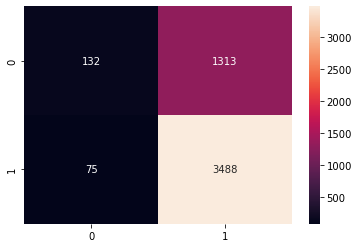

              precision    recall  f1-score   support

         0.0       0.64      0.09      0.16      1445
         1.0       0.73      0.98      0.83      3563

    accuracy                           0.72      5008
   macro avg       0.68      0.54      0.50      5008
weighted avg       0.70      0.72      0.64      5008

Accuracy of XGB on training set: 0.72
72.56637168141593
              precision    recall  f1-score   support

         0.0       0.67      0.10      0.17       619
         1.0       0.73      0.98      0.84      1528

    accuracy                           0.73      2147
   macro avg       0.70      0.54      0.50      2147
weighted avg       0.71      0.73      0.64      2147



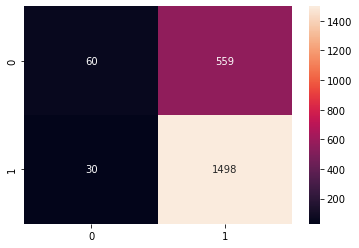

Accuracy of svm on test set: 0.73


 ===========   Class-wise test accuracy    =============
classwise accuracy:  [0.09693053 0.98036649]
average accuracy:  0.5386485126322645


In [40]:
from sklearn.svm import SVC
# svm = SVC(
#     C = 10, # Cfloat, default=1.0
#     kernel = 'sigmoid', #kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
#     degree = 5, #degree, default=3
#     gamma = 0.1, #gamma{‘scale’, ‘auto’} or float, default=’scale’
#     class_weight = None, # ‘balanced’, default=None
#     max_iter = 15,
# #     decision_function_shape = 'ovo' # {‘ovo’, ‘ovr’}, default=’ovr’
# )

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'degree': [0,1,2,3],
              'max_iter': [10,15,20],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, Y_train)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

svm = SVC(C = grid.best_params_['C'],
         gamma = grid.best_params_['gamma'],
         degree = grid.best_params_['degree'],
         max_iter = grid.best_params_['max_iter'],
         kernel = grid.best_params_['kernel']
         )

svm.fit(X_train, Y_train)

pred=svm.predict(X_test)
pred_train=svm.predict(X_train)


print("===========   Train Dataset    =============")

print(accuracy_score(Y_train, pred_train)*100)

confusion_matrix_dt_train = pd.DataFrame(confusion_matrix(Y_train, pred_train))
sns.heatmap(confusion_matrix_dt_train, annot=True,fmt='g')
plt.show()

print(classification_report(Y_train, pred_train))

train_acc = svm.score(X_train, Y_train)
print('Accuracy of XGB on training set: {:.2f}'.format(train_acc))


print(accuracy_score(Y_test, pred)*100)

confusion_matrix_svm = confusion_matrix(Y_test, pred)
sns.heatmap(confusion_matrix_svm, annot=True, fmt='g')
print(classification_report(Y_test, pred))
plt.show()

test_acc = svm.score(X_test, Y_test)
print('Accuracy of svm on test set: {:.2f}'.format(test_acc))

print("\n\n ===========   Class-wise test accuracy    =============")
acc = confusion_matrix_svm.diagonal()/confusion_matrix_svm.sum(axis=1)
print('classwise accuracy: ',(acc))
print('average accuracy: ',( np.sum(acc)/2))